In [1]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy as sc
import scipy.stats as stats
from tqdm import tqdm
sys.path.append('../')
from cross_analytics.crosspy.core import synchrony
from cross_analytics.crosspy.core import criticality
import shutil
import pickle
import os.path as op
import os
import re
import networkx as nx
from networkx.algorithms import community
import matplotlib as mpl

/scratch/nbe/leap_mcpsych/Aleksi/cross_analytics/crosspy/core/synchrony.py:174: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/scratch/nbe/leap_mcpsych/Aleksi/cross_analytics/crosspy/core/synchrony.py:188: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/scratch/nbe/leap_mcpsych/Aleksi/cross_analytics/crosspy/core/phase.py:1

In [2]:
clinical_ids = np.load('clinical_ids.npy')
DFA_KL_86 = np.empty((86, 30, 30))
PLV_KL_86 = np.empty((86, 30, 30))
order_KL_86 = np.empty((86, 30, 30))
sd_KL_86 = np.empty((86, 30, 30))
#ts_KL_temp_ = np.empty((86, 30, 30))

for i, n in enumerate(clinical_ids):
    for k in range(1, 31):
        for l in range(1, 31):
            DFA_KL_86[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{n}/sub-{n}_K-{k}_L-{l}_dfa.npy"))
            PLV_KL_86[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{n}/sub-{n}_K-{k}_L-{l}_plv.npy"))
            order_KL_86[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{n}/sub-{n}_K-{k}_L-{l}_order.npy"))
            sd_KL_86[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{n}/sub-{n}_K-{k}_L-{l}_std.npy"))
            #ts_KL_temp_[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{n}/sub-{n}_K-{k}_L-{l}_timeseries.npy"))

In [3]:
np.save('/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/order_KL.npy', order_KL_86)
np.save('/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/PLV_KL.npy', PLV_KL_86)
np.save('/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/DFA_KL.npy', DFA_KL_86)
np.save('/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/sd_KL.npy', sd_KL_86)

In [2]:
DFA_KL_86 = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/DFA_KL.npy")
PLV_KL_86 = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/PLV_KL.npy")
sd_KL_86 = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/sd_KL.npy")
order_KL_86 = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/order_KL.npy")

18
0.9884780542428858


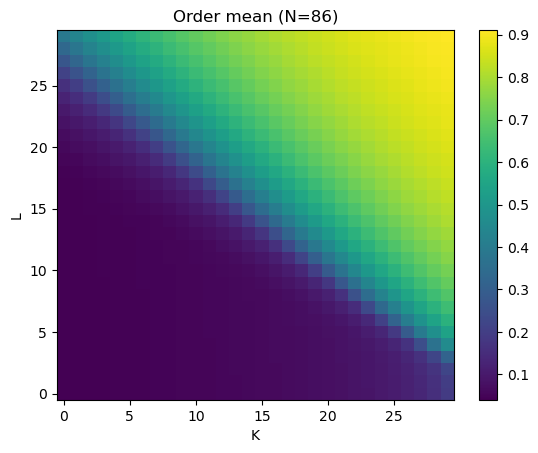

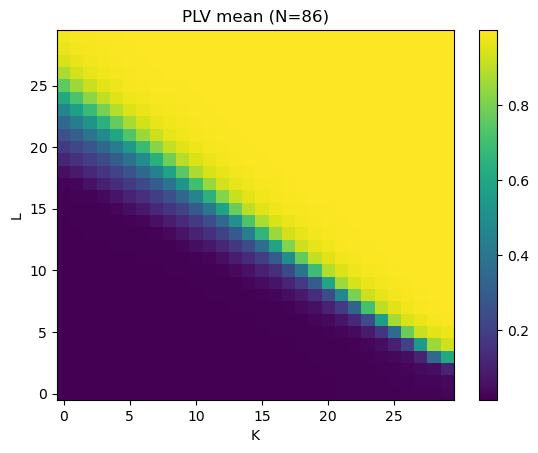

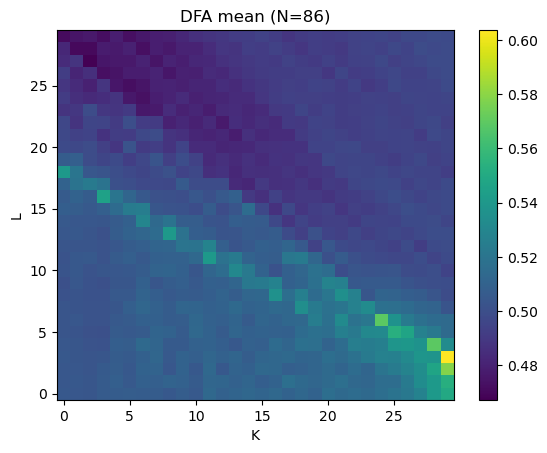

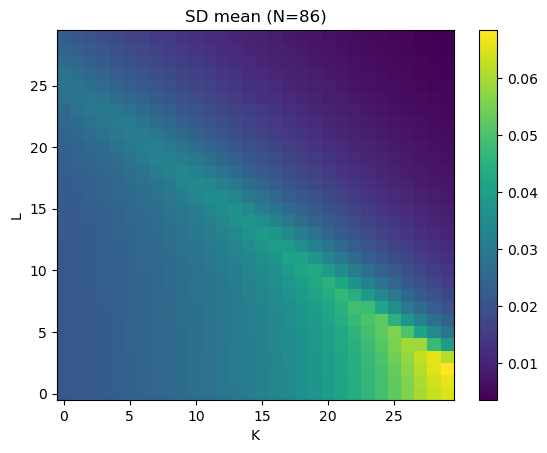

In [5]:
im = plt.imshow(np.mean(order_KL_86, axis=0).T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("Order mean (N=86)")
plt.colorbar(im)
#plt.savefig("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/plots/order.png", dpi=150)
print(np.argmax(DFA_KL_86[-2][:, 8]))
print(PLV_KL_86[-2][25, 8])
plt.show()
plt.clf()

im = plt.imshow(PLV_KL_86[1].T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("PLV mean (N=86)")
plt.colorbar(im)
#plt.savefig("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/plots/plv.png", dpi=150)
plt.show()

plt.clf()
im = plt.imshow(DFA_KL_86[1].T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("DFA mean (N=86)")
plt.colorbar(im)
#plt.savefig("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/plots/dfa.png", dpi=150)
plt.show()

plt.clf()
im = plt.imshow(np.mean(sd_KL_86, axis=0).T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("SD mean (N=86)")
plt.colorbar(im)
plt.show()
#plt.savefig("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/plots/std.png", dpi=150)

In [6]:
print(f'The most critical point in DFA for all subjects - {np.unravel_index(DFA_KL_86[1].argmax(), DFA_KL_86[1].shape)}')
print(f'The value of the most critical point - {np.amax(DFA_KL_86[1])}')
critical_ridge = np.argwhere(DFA_KL_86[1]>0.54)
print(f'Number of KL-pairs in critical ridge in DFA - {critical_ridge.shape[0]}')
flattened = np.ndarray.flatten(DFA_KL_86[1])
sorted = np.sort(flattened[::-1])
top_5_exponents = sorted[-45:]
mean_top_5 = np.mean(top_5_exponents)
print(f'Mean DFA scaling exponent of the top 5 percent of exponents - {mean_top_5}')

The most critical point in DFA for all subjects - (29, 3)
The value of the most critical point - 0.6036430543996435
Number of KL-pairs in critical ridge in DFA - 15
Mean DFA scaling exponent of the top 5 percent of exponents - 0.539546598080566


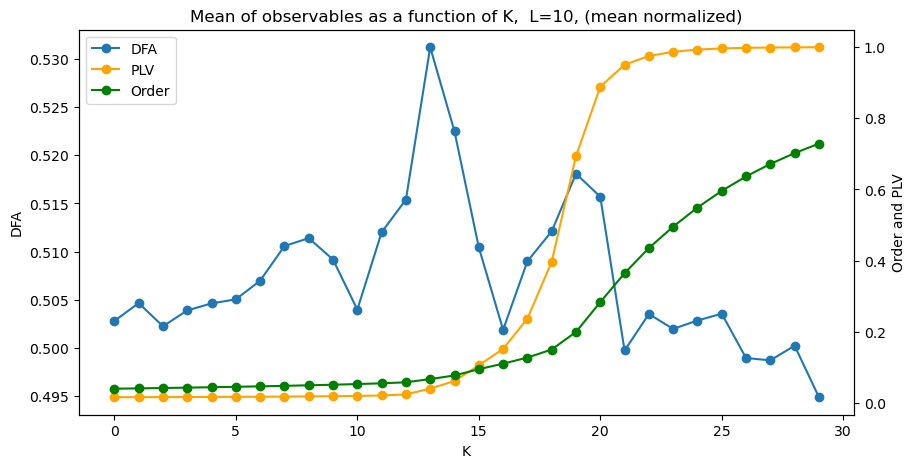

In [10]:
fig, ax1 = plt.subplots(figsize=(10,5))
L_val = 10
ax1.plot(DFA_KL_86[1][:, L_val],'-o', label='DFA')
ax1.set_xlabel('K')
ax1.set_ylabel('DFA')

ax2 = ax1.twinx()
ax2.plot(PLV_KL_86[1][:, L_val],'-o', color='orange', label='PLV')
ax2.plot(order_KL_86[1][:, L_val],'-o', color='green', label='Order')
ax2.set_ylabel('Order and PLV')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left')

ax1.set_title(f'Mean of observables as a function of K,  L={L_val}, (mean normalized)')
ax1.set_xlabel('K')
ax1.set_ylabel('DFA')
#plt.savefig("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/plots/lineplot_k_4.png", dpi=150)
plt.show()

In [29]:
# Single subject tests (006)
clinical_ids = np.load('clinical_ids.npy')
DFA_KL_temp_006 = np.empty((86, 30, 30))
PLV_KL_temp_006 = np.empty((86, 30, 30))
order_KL_temp_006 = np.empty((86, 30, 30))
sd_KL_temp_006 = np.empty((86, 30, 30))

for i, n in enumerate(clinical_ids):
    for k in range(1, 31):
        for l in range(1, 31):
            DFA_KL_temp_006[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-006/sub-006_K-{k}_L-{l}_dfa.npy"))
            PLV_KL_temp_006[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-006/sub-006_K-{k}_L-{l}_plv.npy"))
            order_KL_temp_006[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-006/sub-006_K-{k}_L-{l}_order.npy"))
            sd_KL_temp_006[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-006/sub-006_K-{k}_L-{l}_std.npy"))

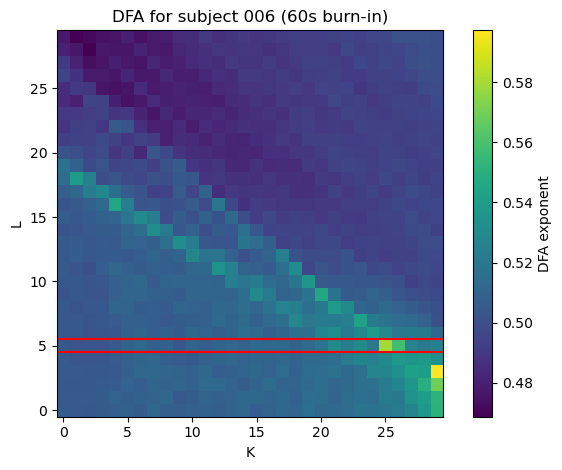

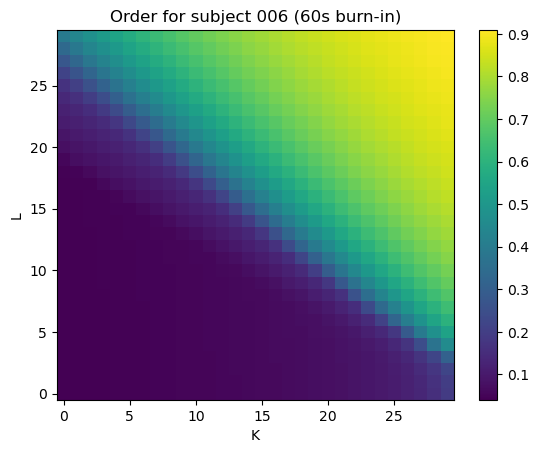

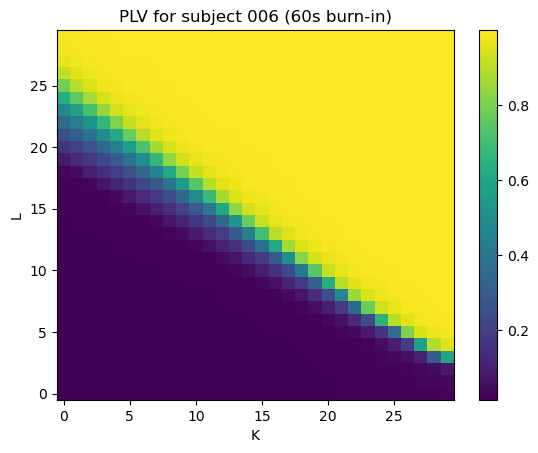

In [30]:
im = plt.imshow(DFA_KL_temp_006[1].T, origin = 'lower')
plt.xlabel("K")
plt.ylabel("L")
plt.title("DFA for subject 006 (60s burn-in)")  
plt.colorbar(im, label = 'DFA exponent', )
plt.axhline(5.5, color='red')
plt.axhline(4.5, color='red')
plt.tight_layout()
plt.show()

im = plt.imshow(np.mean(order_KL_temp_006, axis=0).T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("Order for subject 006 (60s burn-in)")
plt.colorbar(im)
plt.show()

im = plt.imshow(PLV_KL_temp_006[1].T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("PLV for subject 006 (60s burn-in)")
plt.colorbar(im)
plt.show()

In [31]:
print(f'The most critical point in DFA for subject 006 - {np.unravel_index(DFA_KL_temp_006[1].argmax(), DFA_KL_temp_006[1].shape)}')
print(f'The value of the most critical point - {np.amax(DFA_KL_temp_006[1])}')
critical_ridge = np.argwhere(DFA_KL_temp_006[1]>0.54)
print(f'Number of KL-pairs in critical ridge in DFA - {critical_ridge.shape[0]}')
flattened = np.ndarray.flatten(DFA_KL_temp_006[1])
sorted = np.sort(flattened[::-1])
top_5_exponents = sorted[-45:]
mean_top_5 = np.mean(top_5_exponents)
print(f'Mean DFA scaling exponent of the top 5 percent of exponents - {mean_top_5}')

The most critical point in DFA for subject 006 - (29, 3)
The value of the most critical point - 0.5971807533750205
Number of KL-pairs in critical ridge in DFA - 13
Mean DFA scaling exponent of the top 5 percent of exponents - 0.5386992121544866


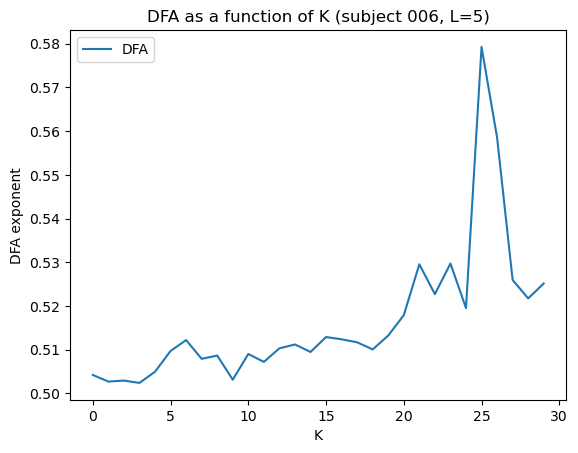

In [32]:
fig, ax1 = plt.subplots()
L_val = 5
ax1.plot(DFA_KL_temp_006[-2][:, L_val], label='DFA')
ax1.set_xlabel('K')
ax1.set_ylabel('DFA exponent')

'''ax2 = ax1.twinx()
ax2.plot(PLV_KL_temp_006[-2][:, L_val], color='orange', label='PLV')
ax2.plot(order_KL_temp_006[-2][:, L_val], color='green', label='Order')
ax2.set_ylabel('Order and PLV')

'''
lines_1, labels_1 = ax1.get_legend_handles_labels()
#lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 
labels = labels_1 
ax1.legend(lines, labels, loc='upper left')

ax1.set_title(f'DFA as a function of K (subject 006, L={L_val})')
ax1.set_xlabel('K')
ax1.set_ylabel('DFA exponent')

plt.show()

In [4]:
# Averaged connectome KL-planes
DFA_KL_ave = np.empty((30, 30))
PLV_KL_ave = np.empty((30, 30))
order_KL_ave = np.empty((30, 30))
sd_KL_ave = np.empty((30, 30))

for k in range(1, 31):
    for l in range(1, 31):
        DFA_KL_ave[k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/data/averaged_subs/averaged_subs_K-{k}_L-{l}_dfa.npy"))
        PLV_KL_ave[k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/data/averaged_subs/averaged_subs_K-{k}_L-{l}_plv.npy"))
        order_KL_ave[k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/data/averaged_subs/averaged_subs_K-{k}_L-{l}_order.npy"))
        sd_KL_ave[k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/data/averaged_subs/averaged_subs_K-{k}_L-{l}_std.npy"))

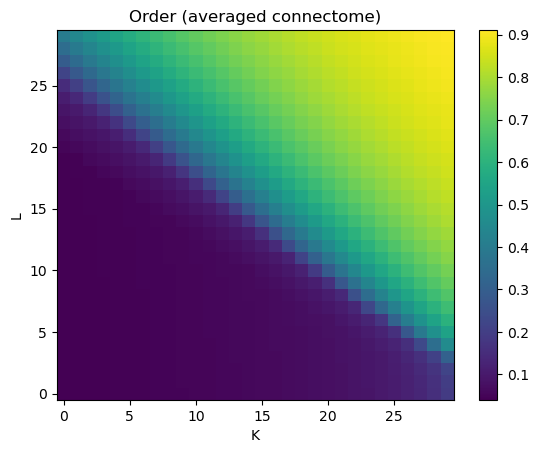

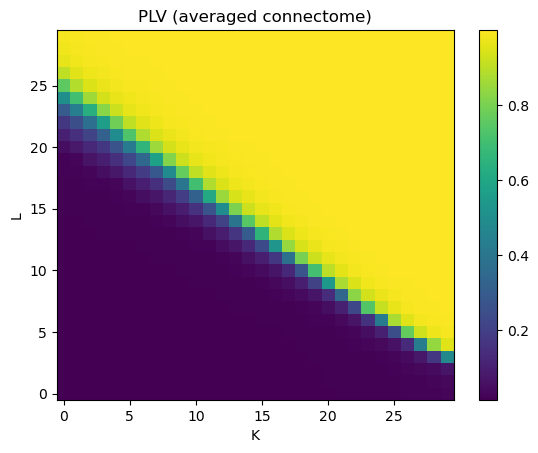

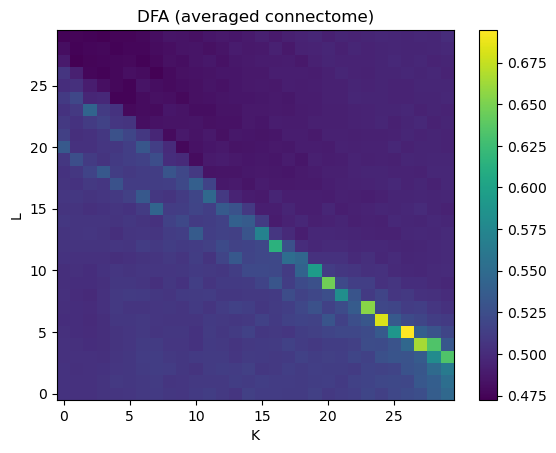

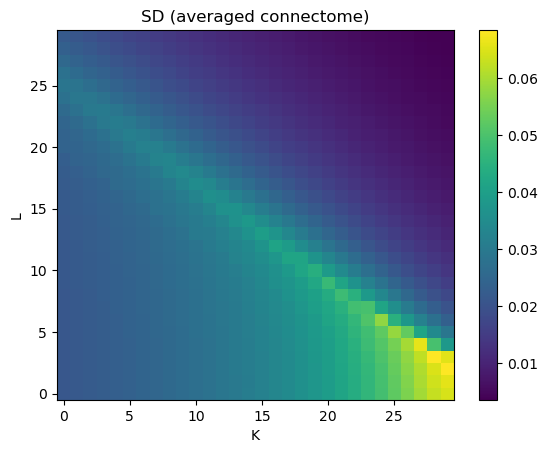

In [5]:
im = plt.imshow(order_KL_ave.T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("Order (averaged connectome)")
plt.colorbar(im)
#plt.savefig("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/plots/order.png", dpi=150)
plt.show()
plt.clf()

im = plt.imshow(PLV_KL_ave.T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("PLV (averaged connectome)")
plt.colorbar(im)
#plt.savefig("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/plots/plv.png", dpi=150)
plt.show()

plt.clf()
im = plt.imshow(DFA_KL_ave.T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("DFA (averaged connectome)")
plt.colorbar(im)
#plt.savefig("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/plots/dfa.png", dpi=150)
plt.show()

plt.clf()
im = plt.imshow(sd_KL_ave.T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("SD (averaged connectome)")
plt.colorbar(im)
#plt.savefig("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/plots/std.png", dpi=150)

In [2]:
timeseries1 = np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-006/sub-006_K-5_L-6_timeseries.npy")
timeseries2 = np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-006/sub-006_K-15_L-6_timeseries.npy")
timeseries3 = np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-006/sub-006_K-25_L-6_timeseries.npy")

In [19]:
print(timeseries1.shape)
print(timeseries1[1].shape)

(200, 150001)
(150001,)


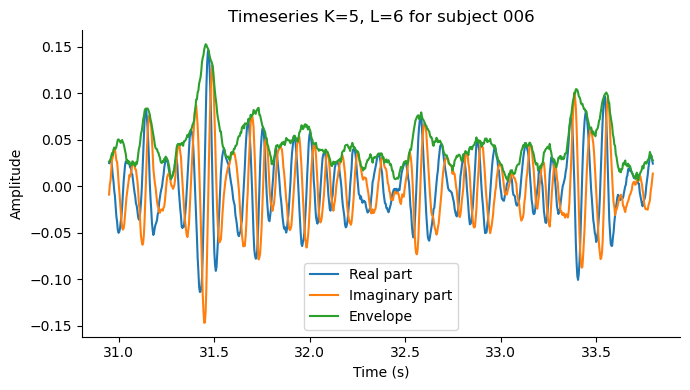

In [3]:
# Timeseries of K=5, L=6 for subject 006
duration = 600
sampling_rate = 250
time = np.linspace(30, duration, duration*sampling_rate+1)
start = 1
end = 4
node = 50
fig, ax = plt.subplots(figsize=(7, 4))
plt.plot(time[start*sampling_rate:end*sampling_rate], timeseries1[1][start*sampling_rate:end*sampling_rate].real)
plt.plot(time[start*sampling_rate:end*sampling_rate], timeseries1[1][start*sampling_rate:end*sampling_rate].imag)
plt.plot(time[start*sampling_rate:end*sampling_rate], np.abs(timeseries1[1][start*sampling_rate:end*sampling_rate]))
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('Timeseries K=5, L=6 for subject 006')
plt.legend(["Real part", "Imaginary part", "Envelope"])
plt.gca().spines[['right', 'top']].set_visible(False)
plt.tight_layout()
plt.show()

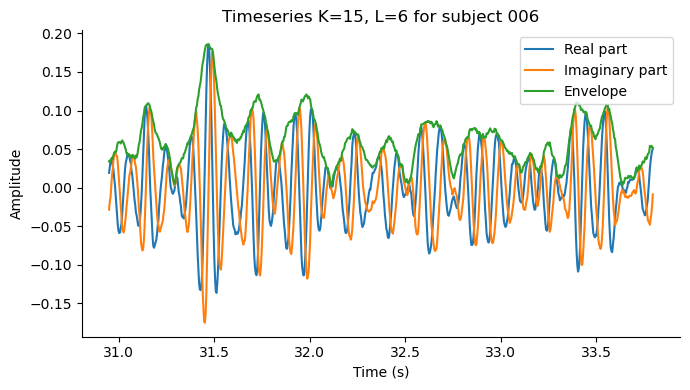

In [21]:
# Timeseries of K=15, L=6 for subject 006
duration = 600
sampling_rate = 250
time = np.linspace(30, duration, duration*sampling_rate+1)
node = 50
fig, ax = plt.subplots(figsize=(7, 4))
plt.plot(time[start*sampling_rate:end*sampling_rate], timeseries2[1][start*sampling_rate:end*sampling_rate].real)
plt.plot(time[start*sampling_rate:end*sampling_rate], timeseries2[1][start*sampling_rate:end*sampling_rate].imag)
plt.plot(time[start*sampling_rate:end*sampling_rate], np.abs(timeseries2[1][start*sampling_rate:end*sampling_rate]))
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('Timeseries K=15, L=6 for subject 006')
plt.legend(["Real part", "Imaginary part", "Envelope"])
plt.gca().spines[['right', 'top']].set_visible(False)
plt.tight_layout()
plt.show()

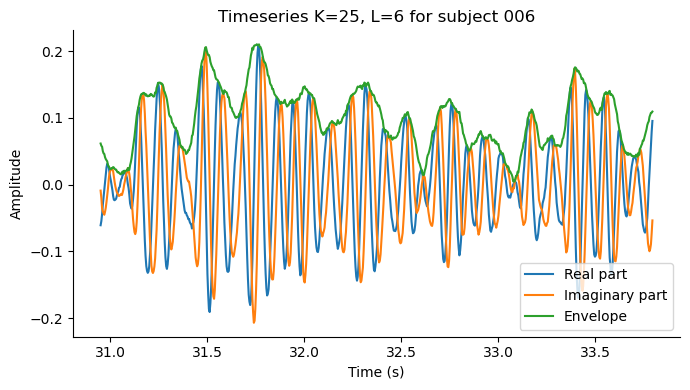

In [22]:
# Timeseries of K=25, L=6 for subject 006
duration = 600
sampling_rate = 250
time = np.linspace(30, duration, duration*sampling_rate+1)
node = 50
fig, ax = plt.subplots(figsize=(7, 4))
plt.plot(time[start*sampling_rate:end*sampling_rate], timeseries3[1][start*sampling_rate:end*sampling_rate].real)
plt.plot(time[start*sampling_rate:end*sampling_rate], timeseries3[1][start*sampling_rate:end*sampling_rate].imag)
plt.plot(time[start*sampling_rate:end*sampling_rate], np.abs(timeseries3[1][start*sampling_rate:end*sampling_rate]))
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('Timeseries K=25, L=6 for subject 006')
plt.legend(["Real part", "Imaginary part", "Envelope"])
plt.gca().spines[['right', 'top']].set_visible(False)
plt.tight_layout()
plt.show()

(150001,)
[0.04067285 0.04157295 0.04236046 ... 0.04581426 0.04565844 0.04578394]


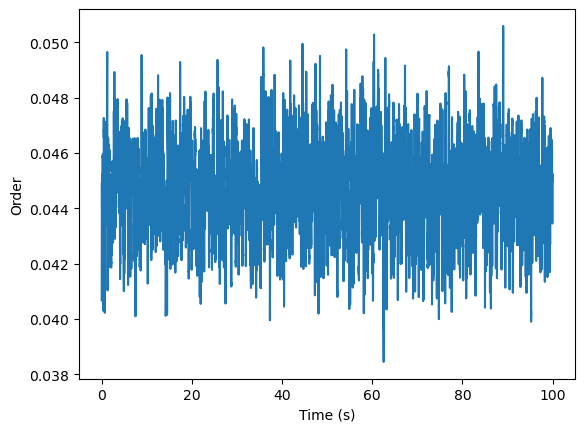

In [23]:
order = np.mean(np.abs(timeseries1), axis=0)
time = np.linspace(0, duration, duration*sampling_rate+1)
start = 0
end = 100
print(order.shape)
print(order)
plt.plot(time[start*sampling_rate:end*sampling_rate], order[start*sampling_rate:end*sampling_rate])
plt.xlabel('Time (s)')
plt.ylabel('Order')
plt.title('')
plt.show()

In [8]:
# KL Sweeps for subject 706
clinical_ids = np.load('clinical_ids.npy')
order_KL_706 = np.empty((86, 30, 30))
PLV_KL_706 = np.empty((86, 30, 30))
DFA_KL_706 = np.empty((86, 30, 30))
sd_KL_706 = np.empty((86, 30, 30))

id = 706
for i, n in enumerate(clinical_ids):
    for k in range(1, 31):
        for l in range(1, 31):
            DFA_KL_706[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_dfa.npy"))
            PLV_KL_706[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_plv.npy"))
            order_KL_706[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_order.npy"))
            sd_KL_706[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_std.npy"))

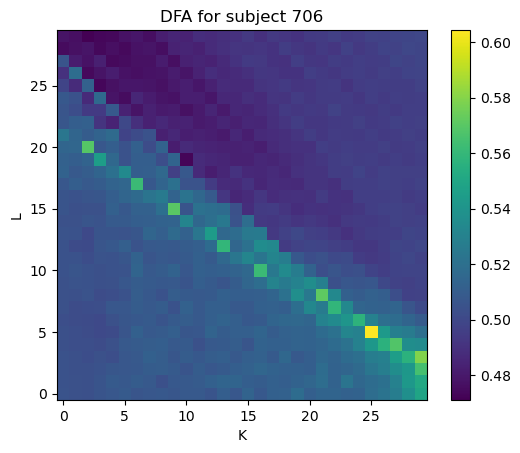

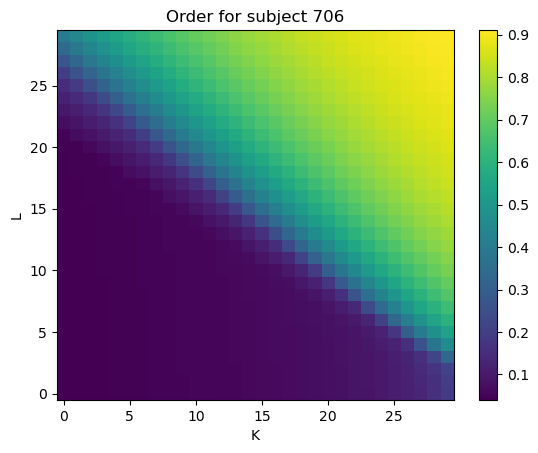

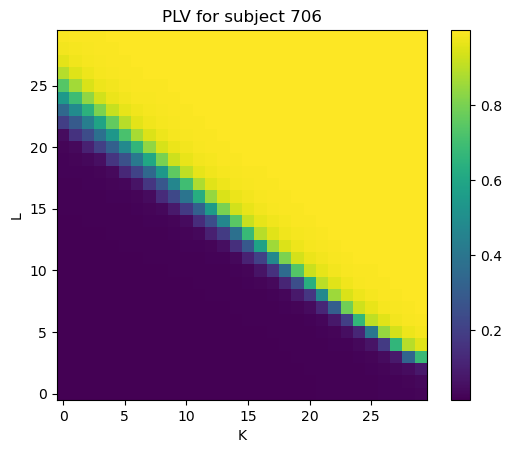

In [3]:
im = plt.imshow(DFA_KL_706[1].T, origin = 'lower')
plt.xlabel("K")
plt.ylabel("L")
plt.title(f"DFA for subject {id}")
plt.colorbar(im)
plt.show()

im = plt.imshow(np.mean(order_KL_706, axis=0).T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title(f"Order for subject {id}")
plt.colorbar(im)
plt.show()

im = plt.imshow(PLV_KL_706[1].T, origin = 'lower')
plt.xlabel("K")
plt.ylabel("L")
plt.title(f"PLV for subject {id}")
plt.colorbar(im)
plt.show()

In [4]:
print(f'The most critical point in DFA for subject 706 - {np.unravel_index(DFA_KL_706[1].argmax(), DFA_KL_706[1].shape)}')
print(f'The value of the most critical point - {np.amax(DFA_KL_706[1])}')
critical_ridge = np.argwhere(DFA_KL_706[1]>0.55)
print(f'Number of KL-pairs in critical ridge in DFA - {critical_ridge.shape[0]}')
flattened = np.ndarray.flatten(DFA_KL_706[1])
sorted = np.sort(flattened[::-1])
top_5_exponents = sorted[-45:]
mean_top_5 = np.mean(top_5_exponents)
print(f'Mean DFA scaling exponent of the top 5 percent of exponents - {mean_top_5}')

The most critical point in DFA for subject 706 - (25, 5)
The value of the most critical point - 0.6043671087049867
Number of KL-pairs in critical ridge in DFA - 15
Mean DFA scaling exponent of the top 5 percent of exponents - 0.5465108149707332


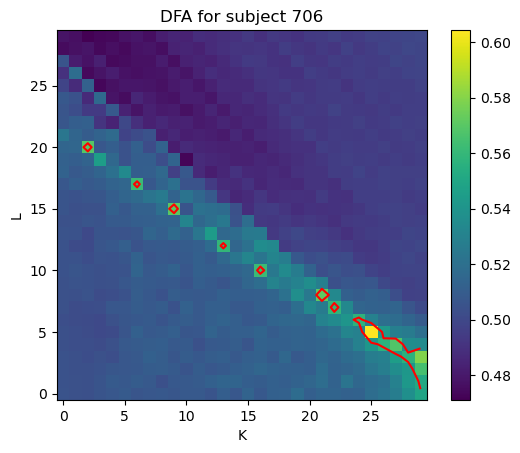

In [5]:
# Visualising observables (potential for GP, synchronizability, and potential for criticality)
threshold = 0.55

# Create the plot
im = plt.imshow(DFA_KL_706[1].T, origin = 'lower')

# Add red contours for values above the threshold
plt.contour(DFA_KL_706[1].T, levels=[threshold, 1], colors='red')

# Show the plot
plt.colorbar(im)
plt.xlabel("K")
plt.ylabel("L")
plt.title(f"DFA for subject {id}")
plt.show()

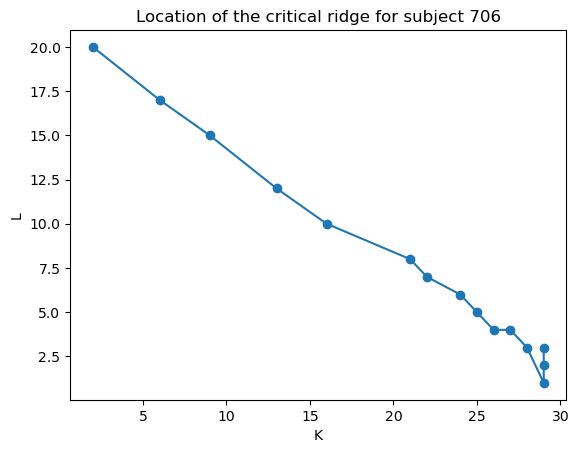

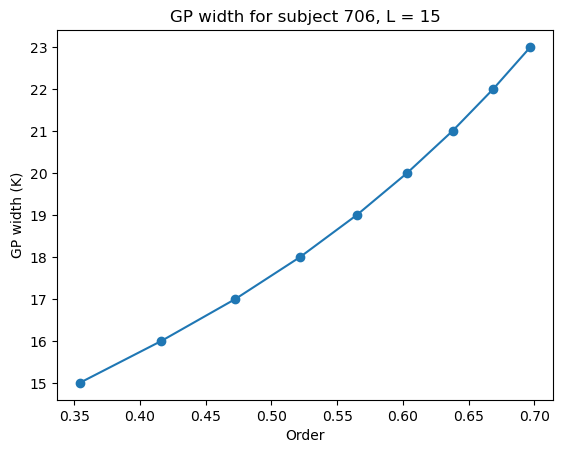

Mean DFA scaling exponent of the top 5 percent of exponents for subject 706 - 0.5465108149707332


In [55]:
# Synchronizability for subject 706, location of the critical ridge (a ridge at smaller K and L values indicates greater
# synchronizability) , DFA > 0.55
L_val = 15
K = critical_ridge[:, 0]  
L = critical_ridge[:, 1]  
plt.plot(K, L, 'o-')
plt.xlabel('K')
plt.ylabel('L')
plt.title('Location of the critical ridge for subject 706')
plt.show()
# Potential for GP for subject 706, width of the critical ridge or area below the critical region (wider ridge indicates 
# greater potential for GP)
# IDEA: weight (connectome) on x-axis and gp-width on y-axis (where I get gp-width?)
order_values = order_KL_706[1][:, L_val]
order = order_values[(order_values >= 0.3) & (order_values <= 0.7)]
K = np.where((order_values >= 0.3) & (order_values <= 0.7))[0]
plt.plot(order, K, 'o-')
plt.ylabel('GP width (K)')
plt.xlabel('Order')
plt.title(f'GP width for subject 706, L = {L_val}')
plt.show()

# Potential for criticality for subject 706, mean DFA scaling exponent of the top 5 % of the exponents (greater mean exponent
# indicates greater potential for criticality)
flattened_706 = np.ndarray.flatten(DFA_KL_706[1])
sorted_706 = np.sort(flattened_706[::-1])
top_5_exponents_706 = sorted_706[-45:]
mean_top_5_706 = np.mean(top_5_exponents_706)
print(f'Mean DFA scaling exponent of the top 5 percent of exponents for subject 706 - {mean_top_5_706}')

In [2]:
clinical_ids = np.load('clinical_ids.npy')
order_sub695 = np.empty((86,30,30))
order_sub706 = np.empty((86,30,30))
order_sub714 = np.empty((86,30,30))
for i, n in enumerate(clinical_ids):
    for k in range(1, 31):
        for l in range(1, 31):
            order_sub695[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-695/sub-695_K-{k}_L-15_order.npy"))
            order_sub706[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-706/sub-706_K-{k}_L-15_order.npy"))
            order_sub714[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-714/sub-714_K-{k}_L-15_order.npy"))

GP widths for subjects [695, 706, 714] (L = 15) are [9.003033875013937, 8.632395851955819, 8.33589361636055]


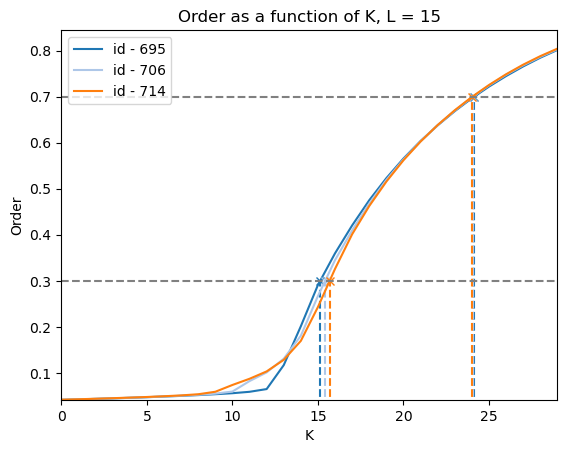

In [3]:
L_val = 15
sub_list = [695, 706, 714]
order_subs = [order_sub695[1][:, L_val], order_sub706[1][:, L_val], order_sub714[1][:, L_val]]
# Constant over subjects, define once
k_values = np.arange(0, 30)

ord_min = 0.3
ord_max = 0.7

# Any cmap goes, it's needed to match plot colors
cmap = plt.colormaps["tab20"](np.arange(0, len(order_subs)))
# Find function K(Order) !!
interpolated = [sc.interpolate.interp1d(order, k_values) for order in order_subs]
ynew = [ord_min, ord_max]

fig, ax = plt.subplots()
for i, interpol in enumerate(interpolated):
    ax.plot(interpol(ynew), ynew, 'x', color=cmap[i])
    ax.vlines(x=interpol(ynew), ymin=0, ymax=ynew, color=cmap[i], linestyle='--')
    ax.plot(k_values, order_subs[i], color=cmap[i], label=f'id - {sub_list[i]}')
    
# Order limits
ax.hlines(y=ynew, xmin=min(k_values), xmax=max(k_values), color='grey', linestyle='--')

# Limits to make things look nice
ax.set_ylim(min(order_subs[i]))
ax.set_xlim(0, max(k_values))
ax.set_xlabel('K')
ax.set_ylabel('Order')
ax.set_title(f'Order as a function of K, L = {L_val}')
ax.legend()
# Compute GP widths for each dataset
gp_widths = [interpol(ynew[1])-interpol(ynew[0]) for interpol in interpolated]

print(f'GP widths for subjects {sub_list} (L = {L_val}) are', gp_widths)

In [2]:
# Defining location of the critical ridge (synchronzability)
DFA_KL_695 = np.empty((86,30,30))
DFA_KL_706 = np.empty((86,30,30))
DFA_KL_714 = np.empty((86,30,30))
clinical_ids = np.load('clinical_ids.npy')
for i, n in enumerate(clinical_ids):
    for k in range(1, 31):
        for l in range(1, 31):
            DFA_KL_695[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-695/sub-695_K-{k}_L-{l}_dfa.npy"))
            DFA_KL_706[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-706/sub-706_K-{k}_L-{l}_dfa.npy"))
            DFA_KL_714[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-714/sub-714_K-{k}_L-{l}_dfa.npy"))


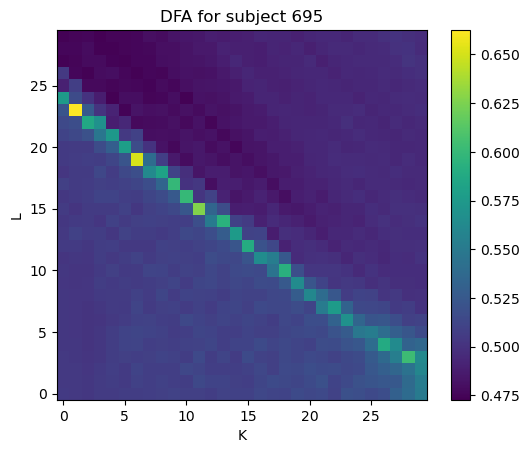

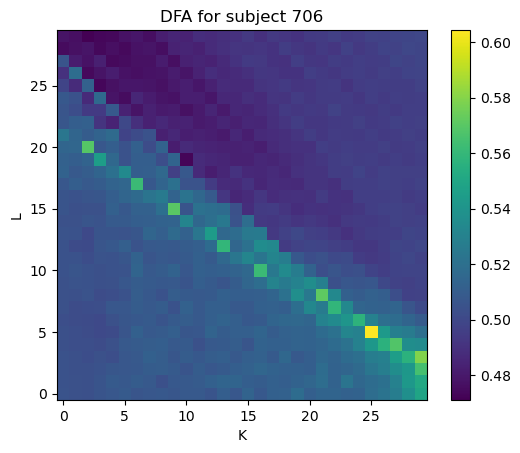

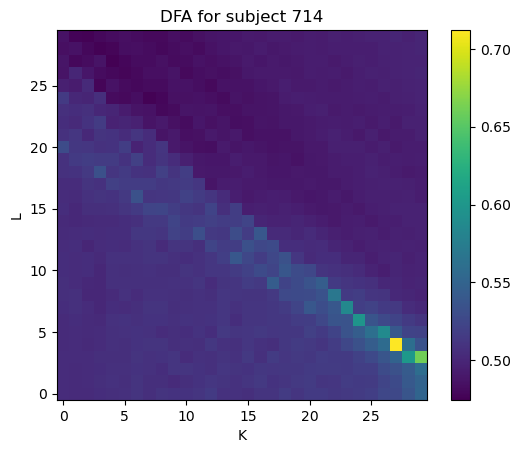

In [5]:
im = plt.imshow(DFA_KL_695[1].T, origin = 'lower')
plt.xlabel("K")
plt.ylabel("L")
plt.title(f"DFA for subject 695")
plt.colorbar(im)
plt.show()

im = plt.imshow(DFA_KL_706[1].T, origin = 'lower')
plt.xlabel("K")
plt.ylabel("L")
plt.title(f"DFA for subject 706")
plt.colorbar(im)
plt.show()

im = plt.imshow(DFA_KL_714[1].T, origin = 'lower')
plt.xlabel("K")
plt.ylabel("L")
plt.title(f"DFA for subject 714")
plt.colorbar(im)
plt.show()

The most critical point in DFA for subject 695 - (1, 23)
The value of the most critical point - 0.6625127823090331
Number of KL-pairs in critical ridge in DFA - 33
Mean DFA scaling exponent of the top 5 percent of exponents (subject 695) - 0.5687300816245661

The most critical point in DFA for subject 706 - (25, 5)
The value of the most critical point - 0.6043671087049867
Number of KL-pairs in critical ridge in DFA - 15
Mean DFA scaling exponent of the top 5 percent of exponents (subject 706) - 0.5465108149707332

The most critical point in DFA for subject 714 - (27, 4)
The value of the most critical point - 0.7120410721669197
Number of KL-pairs in critical ridge in DFA - 13
Mean DFA scaling exponent of the top 5 percent of exponents (subject 714) - 0.5520721786767181

Bias for sub 695: 23.71883618602495, slope: -0.7632792269310928
Bias for sub 706: 20.894884372810086, slope: -0.6419060967063767
Bias for sub 714: 27.09935205183582, slope: -0.8704103671706254


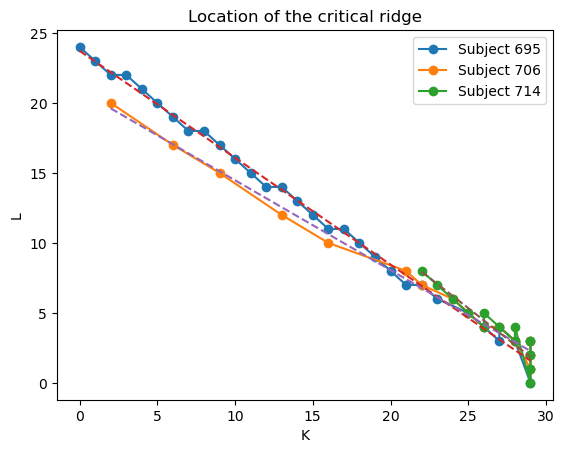

In [6]:
# For subject 695
print(f'The most critical point in DFA for subject 695 - {np.unravel_index(DFA_KL_695[1].argmax(), DFA_KL_695[1].shape)}')
print(f'The value of the most critical point - {np.amax(DFA_KL_695[1])}')
critical_ridge_695 = np.argwhere(DFA_KL_695[1] > 0.55)
print(f'Number of KL-pairs in critical ridge in DFA - {critical_ridge_695.shape[0]}')
flattened_695 = np.ndarray.flatten(DFA_KL_695[1])
sorted_695 = np.sort(flattened_695[::-1])
top_5_exponents_695 = sorted_695[-45:]
mean_top_5_695 = np.mean(top_5_exponents_695)
print(f'Mean DFA scaling exponent of the top 5 percent of exponents (subject 695) - {mean_top_5_695}\n')

L_val = 15
K_695 = critical_ridge_695[:, 0]
L_695 = critical_ridge_695[:, 1]
regression_coeffs_695 = np.polyfit(K_695, L_695, 1)
bias_695 = regression_coeffs_695[1]
slope_695 = regression_coeffs_695[0]

# For subject 706
print(f'The most critical point in DFA for subject 706 - {np.unravel_index(DFA_KL_706[1].argmax(), DFA_KL_706[1].shape)}')
print(f'The value of the most critical point - {np.amax(DFA_KL_706[1])}')
critical_ridge_706 = np.argwhere(DFA_KL_706[1] > 0.55)
print(f'Number of KL-pairs in critical ridge in DFA - {critical_ridge_706.shape[0]}')
flattened_706 = np.ndarray.flatten(DFA_KL_706[1])
sorted_706 = np.sort(flattened_706[::-1])
top_5_exponents_706 = sorted_706[-45:]
mean_top_5_706 = np.mean(top_5_exponents_706)
print(f'Mean DFA scaling exponent of the top 5 percent of exponents (subject 706) - {mean_top_5_706}\n')

L_val = 15
K_706 = critical_ridge_706[:, 0]
L_706 = critical_ridge_706[:, 1]
regression_coeffs_706 = np.polyfit(K_706, L_706, 1)
bias_706 = regression_coeffs_706[1]
slope_706 = regression_coeffs_706[0]

# For subject 714
print(f'The most critical point in DFA for subject 714 - {np.unravel_index(DFA_KL_714[1].argmax(), DFA_KL_714[1].shape)}')
print(f'The value of the most critical point - {np.amax(DFA_KL_714[1])}')
critical_ridge_714 = np.argwhere(DFA_KL_714[1] > 0.55)
print(f'Number of KL-pairs in critical ridge in DFA - {critical_ridge_714.shape[0]}')
flattened_714 = np.ndarray.flatten(DFA_KL_714[1])
sorted_714 = np.sort(flattened_714[::-1])
top_5_exponents_714 = sorted_714[-45:]
mean_top_5_714 = np.mean(top_5_exponents_714)
print(f'Mean DFA scaling exponent of the top 5 percent of exponents (subject 714) - {mean_top_5_714}\n')

L_val = 15
K_714 = critical_ridge_714[:, 0]
L_714 = critical_ridge_714[:, 1]
regression_coeffs_714 = np.polyfit(K_714, L_714, 1)
bias_714 = regression_coeffs_714[1]
slope_714 = regression_coeffs_714[0]

# Plot the critical ridge for all subjects
plt.plot(K_695, L_695, 'o-', label='Subject 695')
plt.plot(K_706, L_706, 'o-', label='Subject 706')
plt.plot(K_714, L_714, 'o-', label='Subject 714')

# Plot the regression lines
plt.plot(K_695, np.polyval(regression_coeffs_695, K_695), '--')
plt.plot(K_706, np.polyval(regression_coeffs_706, K_706), '--')
plt.plot(K_714, np.polyval(regression_coeffs_714, K_714), '--')

# Print bias and slope for all subjects
print(f'Bias for sub 695: {bias_695}, slope: {slope_695}')
print(f'Bias for sub 706: {bias_706}, slope: {slope_706}')
print(f'Bias for sub 714: {bias_714}, slope: {slope_714}')

plt.xlabel('K')
plt.ylabel('L')
plt.title('Location of the critical ridge')
plt.legend()
plt.show()


(86, 30, 30)


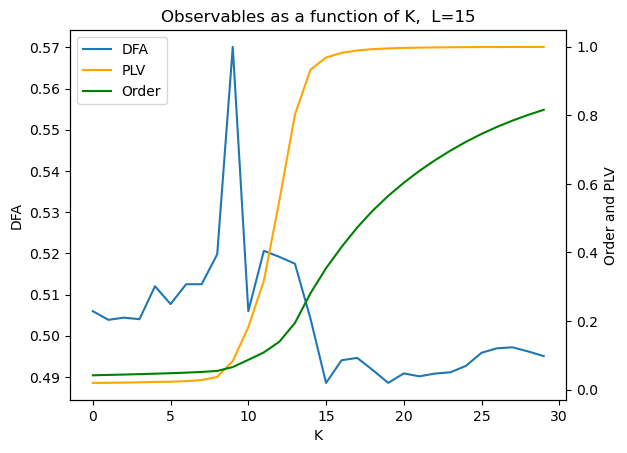

In [9]:
# IDEA: weight (connectome) on x-axis and gp-width on y-axis (where I get gp-width?) # solved
print(order_KL_706.shape)
fig, ax1 = plt.subplots()
L_val = 15
ax1.plot(DFA_KL_706[1][:, L_val], label='DFA')
ax1.set_xlabel('K')
ax1.set_ylabel('DFA')

ax2 = ax1.twinx()
ax2.plot(PLV_KL_706[1][:, L_val], color='orange', label='PLV')
ax2.plot(order_KL_706[1][:, L_val], color='green', label='Order')
ax2.set_ylabel('Order and PLV')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left')

ax1.set_title(f'Observables as a function of K,  L={L_val}')
ax1.set_xlabel('K')
ax1.set_ylabel('DFA')
plt.show()


In [4]:
# Critical subjects 114, 236 and 330
clinical_ids = np.load('clinical_ids.npy')
order_KL_114 = np.empty((86, 30, 30))
PLV_KL_114 = np.empty((86, 30, 30))
DFA_KL_114 = np.empty((86, 30, 30))
sd_KL_114 = np.empty((86, 30, 30))

id = 114
for i, n in enumerate(clinical_ids):
    for k in range(1, 31):
        for l in range(1, 31):
            DFA_KL_114[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_dfa.npy"))
            PLV_KL_114[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_plv.npy"))
            order_KL_114[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_order.npy"))
            sd_KL_114[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_std.npy"))

In [2]:
# Critical subjects 114, 236 and 330
clinical_ids = np.load('clinical_ids.npy')
order_KL_236 = np.empty((86, 30, 30))
PLV_KL_236 = np.empty((86, 30, 30))
DFA_KL_236 = np.empty((86, 30, 30))
sd_KL_236 = np.empty((86, 30, 30))

id = 236
for i, n in enumerate(clinical_ids):
    for k in range(1, 31):
        for l in range(1, 31):
            DFA_KL_236[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_dfa.npy"))
            PLV_KL_236[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_plv.npy"))
            order_KL_236[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_order.npy"))
            sd_KL_236[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_std.npy"))

In [3]:
# Critical subjects 114, 236 and 330
clinical_ids = np.load('clinical_ids.npy')
order_KL_330 = np.empty((86, 30, 30))
PLV_KL_330 = np.empty((86, 30, 30))
DFA_KL_330 = np.empty((86, 30, 30))
sd_KL_330 = np.empty((86, 30, 30))

id = 330
for i, n in enumerate(clinical_ids):
    for k in range(1, 31):
        for l in range(1, 31):
            DFA_KL_330[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_dfa.npy"))
            PLV_KL_330[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_plv.npy"))
            order_KL_330[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_order.npy"))
            sd_KL_330[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_std.npy"))

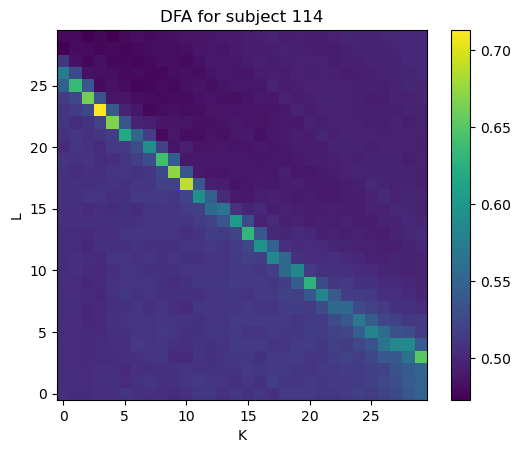

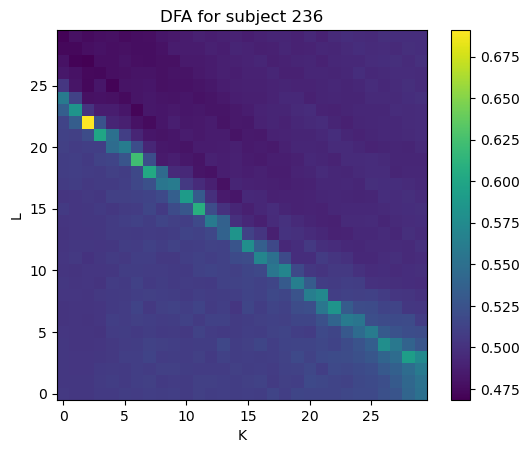

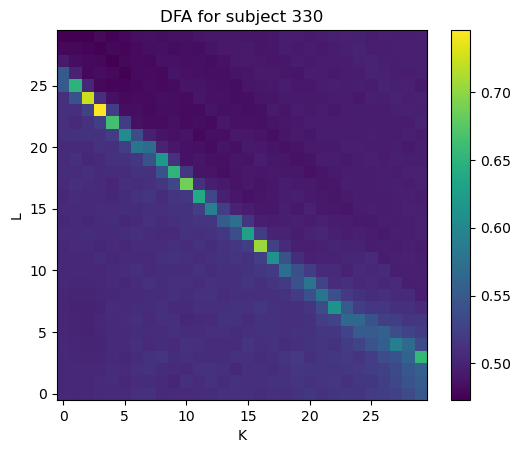

In [5]:
im = plt.imshow(DFA_KL_114[1].T, origin = 'lower')
plt.xlabel("K")
plt.ylabel("L")
plt.title("DFA for subject 114")
plt.colorbar(im)
plt.show()

im = plt.imshow(DFA_KL_236[1].T, origin = 'lower')
plt.xlabel("K")
plt.ylabel("L")
plt.title("DFA for subject 236")
plt.colorbar(im)
plt.show()

im = plt.imshow(DFA_KL_330[1].T, origin = 'lower')
plt.xlabel("K")
plt.ylabel("L")
plt.title("DFA for subject 330")
plt.colorbar(im)
plt.show()

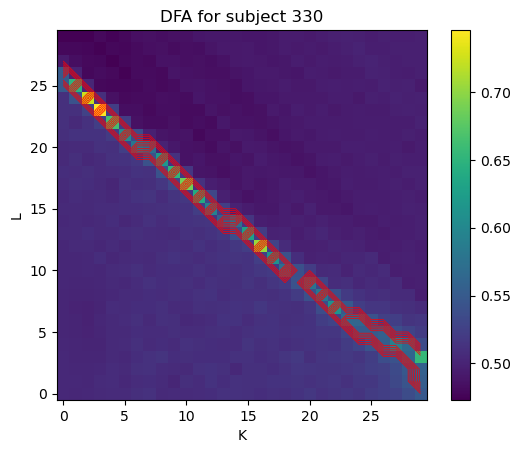

In [5]:
im = plt.imshow(DFA_KL_330[1].T, origin = 'lower')
threshold_mask = DFA_KL_330[1].T > 0.55
plt.contour(threshold_mask, colors='red', linewidths=0.5)
plt.xlabel("K")
plt.ylabel("L")
plt.title("DFA for subject 330")
plt.colorbar(im)
plt.show()

In [6]:
print(f'The most critical point in DFA for subject 114 - {np.unravel_index(DFA_KL_114[1].argmax(), DFA_KL_114[1].shape)}')
print(f'The value of the most critical point - {np.amax(DFA_KL_114[1])}')
critical_ridge114 = np.argwhere(DFA_KL_114[1]>0.55)
print(f'Number of KL-pairs in critical ridge in DFA - {critical_ridge114.shape[0]}')
flattened114 = np.ndarray.flatten(DFA_KL_114[1])
sorted114 = np.sort(flattened114[::-1])
top_5_exponents114 = sorted114[-45:]
mean_top_5_114 = np.mean(top_5_exponents114)
print(f'Mean DFA scaling exponent of the top 5 percent of exponents - {mean_top_5_114}\n')

print(f'The most critical point in DFA for subject 236 - {np.unravel_index(DFA_KL_236[1].argmax(), DFA_KL_236[1].shape)}')
print(f'The value of the most critical point - {np.amax(DFA_KL_236[1])}')
critical_ridge236 = np.argwhere(DFA_KL_236[1]>0.55)
print(f'Number of KL-pairs in critical ridge in DFA - {critical_ridge236.shape[0]}')
flattened236 = np.ndarray.flatten(DFA_KL_236[1])
sorted236 = np.sort(flattened236[::-1])
top_5_exponents236 = sorted236[-45:]
mean_top_5_236 = np.mean(top_5_exponents236)
print(f'Mean DFA scaling exponent of the top 5 percent of exponents - {mean_top_5_236}\n')

print(f'The most critical point in DFA for subject 330 - {np.unravel_index(DFA_KL_330[1].argmax(), DFA_KL_330[1].shape)}')
print(f'The value of the most critical point - {np.amax(DFA_KL_330[1])}')
critical_ridge330 = np.argwhere(DFA_KL_330[1]>0.55)
print(f'Number of KL-pairs in critical ridge in DFA - {critical_ridge330.shape[0]}')
flattened330 = np.ndarray.flatten(DFA_KL_330[1])
sorted330 = np.sort(flattened330[::-1])
top_5_exponents330 = sorted330[-45:]
mean_top_5_330 = np.mean(top_5_exponents330)
print(f'Mean DFA scaling exponent of the top 5 percent of exponents - {mean_top_5_330}')

The most critical point in DFA for subject 114 - (3, 23)
The value of the most critical point - 0.7129259598167969
Number of KL-pairs in critical ridge in DFA - 34
Mean DFA scaling exponent of the top 5 percent of exponents - 0.5858998676587195

The most critical point in DFA for subject 236 - (2, 22)
The value of the most critical point - 0.6909538059745131
Number of KL-pairs in critical ridge in DFA - 34
Mean DFA scaling exponent of the top 5 percent of exponents - 0.5669056154886288

The most critical point in DFA for subject 330 - (3, 23)
The value of the most critical point - 0.7455905608583154
Number of KL-pairs in critical ridge in DFA - 34
Mean DFA scaling exponent of the top 5 percent of exponents - 0.5888729376744058


GP widths for subjects [114, 236, 330] (L = 15) are [8.336966078487825, 9.13848235726283, 8.591070471026915]


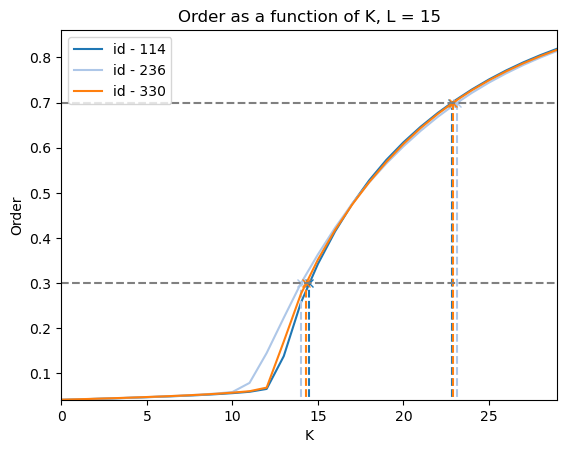

In [40]:
L_val = 15
sub_list = [114, 236, 330]
order_subs = [order_KL_114[1][:, L_val], order_KL_236[1][:, L_val], order_KL_330[1][:, L_val]]
# Constant over subjects, define once
k_values = np.arange(0, 30)

ord_min = 0.3
ord_max = 0.7

# Any cmap goes, it's needed to match plot colors
cmap = plt.colormaps["tab20"](np.arange(0, len(order_subs)))
# Find function K(Order) !!
interpolated = [sc.interpolate.interp1d(order, k_values) for order in order_subs]
ynew = [ord_min, ord_max]

fig, ax = plt.subplots()
for i, interpol in enumerate(interpolated):
    ax.plot(interpol(ynew), ynew, 'x', color=cmap[i])
    ax.vlines(x=interpol(ynew), ymin=0, ymax=ynew, color=cmap[i], linestyle='--')
    ax.plot(k_values, order_subs[i], color=cmap[i], label=f'id - {sub_list[i]}')
    
# Order limits
ax.hlines(y=ynew, xmin=min(k_values), xmax=max(k_values), color='grey', linestyle='--')

# Limits to make things look nice
ax.set_ylim(min(order_subs[i]))
ax.set_xlim(0, max(k_values))
ax.set_xlabel('K')
ax.set_ylabel('Order')
ax.set_title(f'Order as a function of K, L = {L_val}')
ax.legend()
# Compute GP widths for each dataset
gp_widths = [interpol(ynew[1])-interpol(ynew[0]) for interpol in interpolated]

print(f'GP widths for subjects {sub_list} (L = {L_val}) are', gp_widths)

Bias for sub 114: 25.291907265362404, slope: -0.8020985951908985
Bias for sub 236: 23.500077706518024, slope: -0.753204098759804
Bias for sub 330: 25.22060934758334, slope: -0.807066517785931


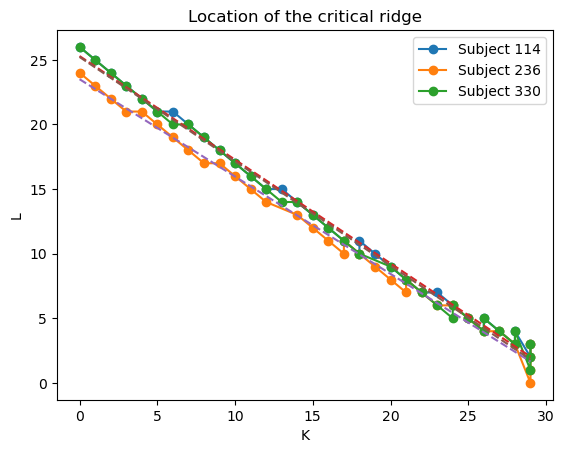

In [41]:
L_val = 15

K_114 = critical_ridge114[:, 0]
L_114 = critical_ridge114[:, 1]
regression_coeffs_114 = np.polyfit(K_114, L_114, 1)
bias_114 = regression_coeffs_114[1]
slope_114 = regression_coeffs_114[0]

K_236 = critical_ridge236[:, 0]
L_236 = critical_ridge236[:, 1]
regression_coeffs_236 = np.polyfit(K_236, L_236, 1)
bias_236 = regression_coeffs_236[1]
slope_236 = regression_coeffs_236[0]

K_330 = critical_ridge330[:, 0]
L_330 = critical_ridge330[:, 1]
regression_coeffs_330 = np.polyfit(K_330, L_330, 1)
bias_330 = regression_coeffs_330[1]
slope_330 = regression_coeffs_330[0]

# Plot the critical ridge for all subjects
plt.plot(K_114, L_114, 'o-', label='Subject 114')
plt.plot(K_236, L_236, 'o-', label='Subject 236')
plt.plot(K_330, L_330, 'o-', label='Subject 330')

# Plot the regression lines
plt.plot(K_114, np.polyval(regression_coeffs_114, K_114), '--')
plt.plot(K_236, np.polyval(regression_coeffs_236, K_236), '--')
plt.plot(K_330, np.polyval(regression_coeffs_330, K_330), '--')

# Print bias and slope for all subjects
print(f'Bias for sub 114: {bias_114}, slope: {slope_114}')
print(f'Bias for sub 236: {bias_236}, slope: {slope_236}')
print(f'Bias for sub 330: {bias_330}, slope: {slope_330}')

plt.xlabel('K')
plt.ylabel('L')
plt.title('Location of the critical ridge')
plt.legend()
plt.show()

In [2]:
# Comparing SC-factors and observables (GP-width and synchronizability)
# Load subject connectomes
id_114 = 114
subject_path_114 = f'/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/sub-CON{id_114}_yeo17_200Parcels_for_fit'
subject_114 = pickle.load(open(subject_path_114, 'rb'))
sc_114 = subject_114['connectome'] / np.mean(subject_114['connectome'])

id_236 = 236
subject_path_236 = f'/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/sub-CON{id_236}_yeo17_200Parcels_for_fit'
subject_236 = pickle.load(open(subject_path_236, 'rb'))
sc_236 = subject_236['connectome'] / np.mean(subject_236['connectome'])

id_330 = 330
subject_path_330 = f'/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/sub-CON{id_330}_yeo17_200Parcels_for_fit'
subject_330 = pickle.load(open(subject_path_330, 'rb'))
sc_330 = subject_330['connectome'] / np.mean(subject_330['connectome'])

In [3]:
# Average clustering coefficient
G_114 = nx.from_numpy_array(sc_114)
clustering_coefficients = nx.clustering(G_114)
correlation_coefficients = nx.degree_pearson_correlation_coefficient(G_114)
avg_clustering_coefficient = nx.average_clustering(G_114)
print(f'Average clustering coefficient for sub 114 - {avg_clustering_coefficient}')

G_236 = nx.from_numpy_array(sc_236)
clustering_coefficients = nx.clustering(G_236)
correlation_coefficients = nx.degree_pearson_correlation_coefficient(G_236)
avg_clustering_coefficient = nx.average_clustering(G_236)
print(f'Average clustering coefficient for sub 236 - {avg_clustering_coefficient}')

G_330 = nx.from_numpy_array(sc_330)
clustering_coefficients = nx.clustering(G_330)
correlation_coefficients = nx.degree_pearson_correlation_coefficient(G_330)
avg_clustering_coefficient = nx.average_clustering(G_330)
print(f'Average clustering coefficient for sub 330 - {avg_clustering_coefficient}')

Average clustering coefficient for sub 114 - 0.9311112161288299
Average clustering coefficient for sub 236 - 0.9514774866131546
Average clustering coefficient for sub 330 - 0.872969407150446


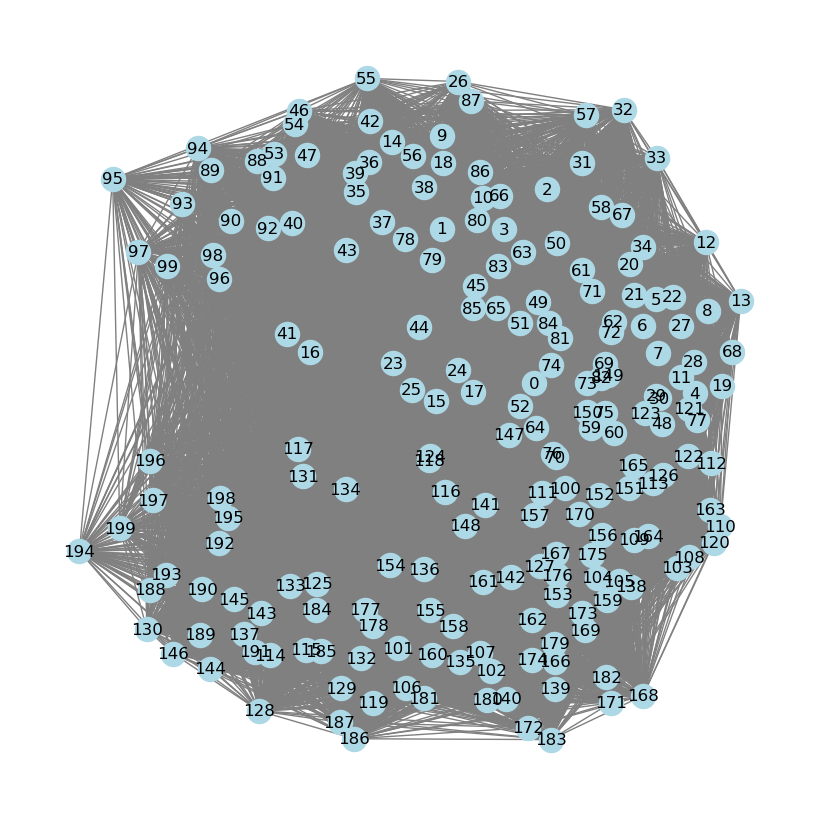

In [4]:
plt.figure(figsize=(8, 8))
nx.draw(G_330, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()

In [5]:
# Modularity
communities = community.greedy_modularity_communities(G_114)
modularity = community.modularity(G_114, communities)
print(f'Modularity for sub 114 - {modularity}')

communities = community.greedy_modularity_communities(G_236)
modularity = community.modularity(G_236, communities)
print(f'Modularity for sub 236 - {modularity}')

communities = community.greedy_modularity_communities(G_330)
modularity = community.modularity(G_330, communities)
print(f'Modularity for sub 330 - {modularity}')


Modularity for sub 114 - 0.33193343663102387
Modularity for sub 236 - 0.26574239754750884
Modularity for sub 330 - 0.3486144997820755


In [2]:
# Load all connectomes
clinical_ids = np.load('clinical_ids.npy')
connectomes = np.empty((86,200,200))
for i, n in enumerate(clinical_ids):
    subject_path_all = f'/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/sub-CON{n}_yeo17_200Parcels_for_fit'
    all_subjects = pickle.load(open(subject_path_all, 'rb'))
    connectomes[i,:,:] = all_subjects['connectome'] / np.mean(all_subjects['connectome'])
print(connectomes.shape)


(86, 200, 200)


In [3]:
graphs = []
for subject in range(connectomes.shape[0]):
    connectome = connectomes[subject]
    G = nx.from_numpy_array(connectome)
    graphs.append(G)

In [4]:
avg_clustering_coeffs = []
for graph in graphs:
    avg_clustering_coeffs.append(nx.average_clustering(graph))

In [5]:
# Load order for all subjects
clinical_ids = np.load('clinical_ids.npy')
order_KL = np.empty((86, 30, 30))
for i, n in enumerate(clinical_ids):
    for k in range(1, 31):
        for l in range(1, 31):
            order_KL[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{n}/sub-{n}_K-{k}_L-{l}_order.npy"))      

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


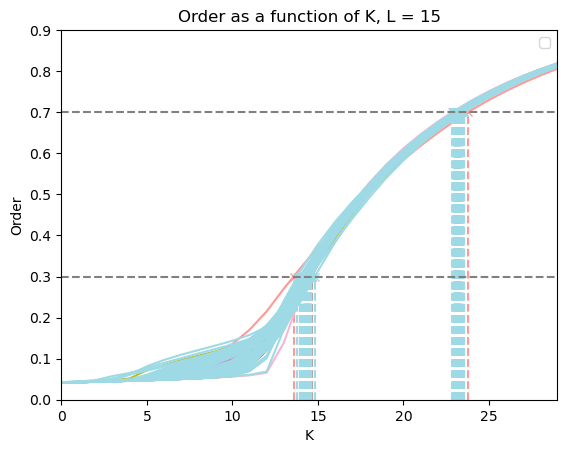

GP widths for all subjects chronologically:
[8.984348159367084, 8.842924815441986, 9.153155846019715, 8.863828359862584, 8.8173346660681, 8.637579149141624, 8.753459817931867, 10.205028510602922, 8.469927913699388, 8.958196434641149, 8.73665502349692, 8.306325316280104, 8.492908950759007, 8.336966078487825, 8.849775222065249, 8.728366613302924, 8.818109278315449, 9.069204080297855, 8.625232526353951, 8.776320748877092, 8.95861335406424, 8.623184786891244, 8.628988200570555, 8.654441806653562, 8.84196886490887, 8.733074005743571, 9.13246167758906, 8.572911227870161, 9.128801160830998, 8.445514799551932, 9.13848235726283, 9.05622800175654, 8.742146818944805, 8.901469611091823, 9.300812028346904, 9.483995782018336, 8.745808893271587, 8.651155381747554, 8.700210057313052, 9.009699900120369, 8.889059270973595, 8.591070471026915, 8.55648114756918, 9.13474826725042, 8.89642512967742, 8.326847336982762, 8.945044967834471, 8.906088714552425, 8.633117854068066, 8.610203253683505, 8.9790453010838

In [ ]:
# Load clinical IDs and order_KL data
clinical_ids = np.load("clinical_ids.npy")

# Constant values
L_val = 15
ord_min = 0.3
ord_max = 0.7
k_values = np.arange(0, 30)

# Create the figure and axes outside the loop
fig, ax = plt.subplots()

# Initialize list for storing GP widths
gp_widths = []

# Iterate over subjects
for i, clinical_id in enumerate(clinical_ids):
    order = order_KL[i][:, L_val]  # Assuming L_val is defined

    cmap = plt.get_cmap("tab20")(i)

    # Find function K(Order)
    interpolated = sc.interpolate.interp1d(order, k_values)
    ynew = [ord_min, ord_max]

    ax.plot(interpolated(ynew), ynew, 'x', color=cmap)
    ax.vlines(x=interpolated(ynew), ymin=0, ymax=ynew, color=cmap, linestyle='--')
    ax.plot(k_values, order, color=cmap)

    # Compute GP width
    gp_width = interpolated(ynew[1]) - interpolated(ynew[0])
    gp_widths.append(gp_width)

# Order limits
ax.hlines(y=ynew, xmin=min(k_values), xmax=max(k_values), color='grey', linestyle='--')

# Limits to make things look nice
ax.set_ylim(0,0.9)
ax.set_xlim(0, max(k_values))
ax.set_xlabel('K')
ax.set_ylabel('Order')
ax.set_title(f'Order as a function of K, L = {L_val}')
ax.legend()

# Save or show the plot as desired
plt.show()

# Print the GP widths
print("GP widths for all subjects chronologically:")
print(gp_widths)


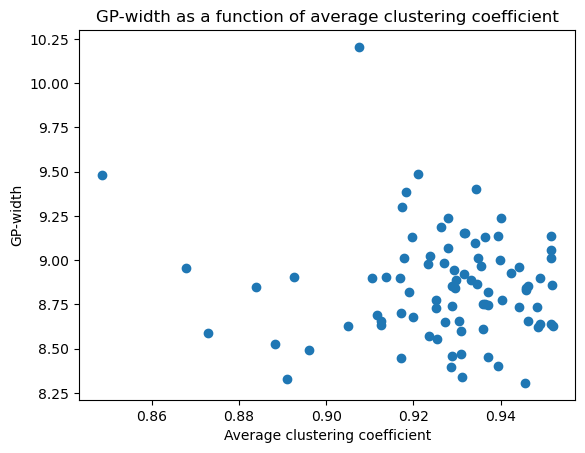

In [ ]:
gp_widths = np.array(gp_widths)
avg_clustering_coeffs = np.array(avg_clustering_coeffs)
plt.scatter(avg_clustering_coeffs, gp_widths)
plt.xlabel('Average clustering coefficient')
plt.ylabel('GP-width')
plt.title('GP-width as a function of average clustering coefficient')
plt.show()

In [ ]:
modularities = []
for i, graph in enumerate(graphs):
     communities = community.greedy_modularity_communities(graph)
     modularity = community.modularity(graph, communities)
     modularities.append(modularity)

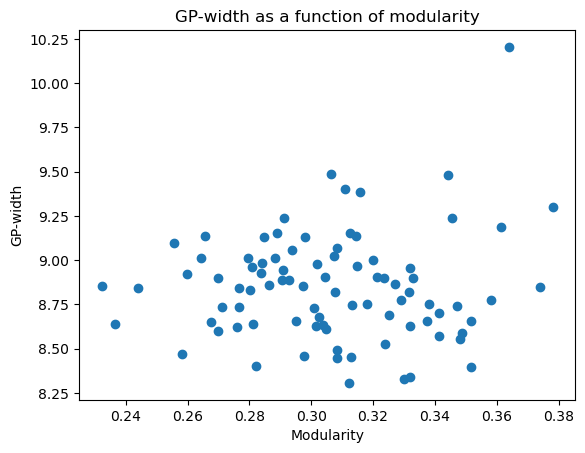

In [ ]:
gp_widths = np.array(gp_widths)
modularities = np.array(modularities)
plt.scatter(modularities, gp_widths)
plt.xlabel('Modularity')
plt.ylabel('GP-width')
plt.title('GP-width as a function of modularity')
plt.show()

In [ ]:
clinical_ids = np.load('clinical_ids.npy')
DFA_KL = np.empty((86, 30, 30))
for i, n in enumerate(clinical_ids):
    for k in range(1, 31):
        for l in range(1, 31):
            DFA_KL[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{n}/sub-{n}_K-{k}_L-{l}_dfa.npy"))

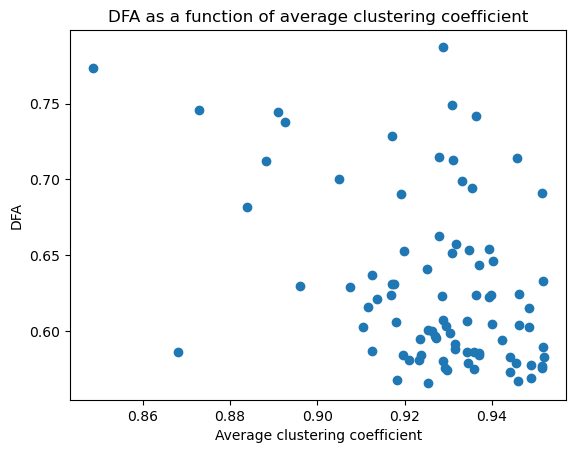

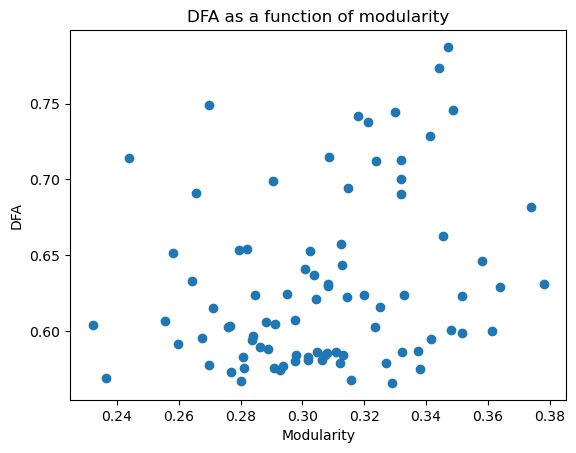

[0.59718075 0.60364305 0.5886116  0.57905535 0.69071075 0.5693823
 0.57486881 0.62937766 0.65144918 0.58666765 0.61564773 0.57924328
 0.629943   0.71292596 0.68188179 0.6408348  0.58586348 0.71469437
 0.58324488 0.56597193 0.58331145 0.60267213 0.70051967 0.59875998
 0.71398484 0.57306687 0.62399802 0.59498913 0.58413587 0.63129788
 0.69095381 0.57742951 0.78733064 0.60261636 0.63125017 0.77328987
 0.58422255 0.59527026 0.72834721 0.65321517 0.57426544 0.74559056
 0.6005818  0.62251247 0.62374306 0.74472124 0.57605148 0.621222
 0.63724053 0.58660016 0.58093863 0.64388109 0.5805085  0.65281393
 0.74215079 0.56749347 0.64600393 0.5866227  0.58668097 0.59993671
 0.61590742 0.60592151 0.58434783 0.62341789 0.58116248 0.57747068
 0.65409803 0.73768929 0.56761177 0.74875895 0.6571678  0.63313151
 0.69932286 0.60491895 0.57585859 0.66251278 0.60436711 0.71204107
 0.60711896 0.62457184 0.59411728 0.59190996 0.62398929 0.60660307
 0.58939124 0.69445871]


In [ ]:
# Average critical DFA for each K for all subjects
max_dfa_per_k = np.max(DFA_KL, axis=(1, 2))
gp_widths = np.array(gp_widths)
modularities = np.array(modularities)

plt.scatter(avg_clustering_coeffs, max_dfa_per_k)
plt.xlabel('Average clustering coefficient')
plt.ylabel('DFA')
plt.title('DFA as a function of average clustering coefficient')
plt.show()

plt.scatter(modularities, max_dfa_per_k)
plt.xlabel('Modularity')
plt.ylabel('DFA')
plt.title('DFA as a function of modularity')
plt.show()
print(max_dfa_per_k)

In [ ]:
# Eigenvalues (network metric)
# 'graphs' variable contains all 86 subject's networkx objects, its dimension is 86,200

eigenvalues = []
for graph in graphs:
    adjacency_matrix = nx.to_numpy_array(graph) 
    eigvals = np.linalg.eigvals(adjacency_matrix) 
    eigenvalues.append(eigvals)
eigenvalues = np.array(eigenvalues)
mean_eigvals = np.mean(eigenvalues, axis = 1)
print(mean_eigvals.shape)

(86,)


In [ ]:
# Assortativity (network metric)
assortativity = []
for graph in graphs:
    assortativity_coef = nx.degree_assortativity_coefficient(graph)
    assortativity.append(assortativity_coef)
assortativity = np.array(assortativity)
print(assortativity.shape)

(86,)


In [15]:
# Average shortest path length (network metric)
path_length = []
for graph in graphs:
    ave_length = nx.average_shortest_path_length(graph)
    path_length.append(ave_length)
path_length = np.array(path_length)
print(path_length.shape)

(86,)


In [ ]:
# Node degree centrality (network metric)
degree_centrality = []
for graph in graphs:
    centra_coeff = nx.degree_centrality(graph)
    degree_centrality.append(centra_coeff)
degree_centrality_list = np.array(degree_centrality)
mean_node_degree_centrality = np.mean([list(subject.values()) for subject in degree_centrality_list], axis=1)
print(mean_node_degree_centrality.shape)

(86,)


In [ ]:
# Potential for criticality for all subjects
num_subjects = DFA_KL.shape[0]
mean_exponents = []
for subject_index in range(num_subjects):
    exponents = DFA_KL[subject_index]
    flattened_exponents = exponents.flatten()

    # Calculate the threshold for the top 5 percent
    threshold = np.percentile(flattened_exponents, 95)

    # Select the exponents above the threshold
    top_exponents = flattened_exponents[flattened_exponents > threshold]
    mean_exponent = np.mean(top_exponents)
    mean_exponents.append(mean_exponent)
mean_exponents = np.array(mean_exponents)
print(mean_exponents.shape)
#print(f'Mean DFA scaling exponent of the top 5 percent of exponents for all subs - {mean_exponents}\n')

(86,)


In [ ]:
# Synchronizability = location of the critical ridge (slope of linear fit to critical ridge)
synchronizabilities = []
biases = []
for i in range(DFA_KL.shape[0]):
    critical_ridge = np.argwhere(DFA_KL[i] > 0.55)
    K = critical_ridge[:, 0]
    L = critical_ridge[:, 1]
    regression_coeffs = np.polyfit(K, L, 1)
    slope = regression_coeffs[0]
    bias = regression_coeffs[1]
    synchronizabilities.append(slope)
    biases.append(bias)
synchronizabilities = np.array(synchronizabilities)
biases = np.array(biases)
print(synchronizabilities.shape)
print(biases.shape)

(86,)
(86,)


/m/nbe/scratch/leap_mcpsych/Aleksi/kuramoto_env2/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


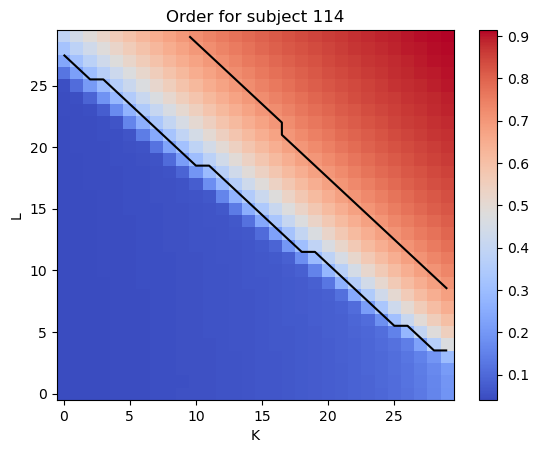

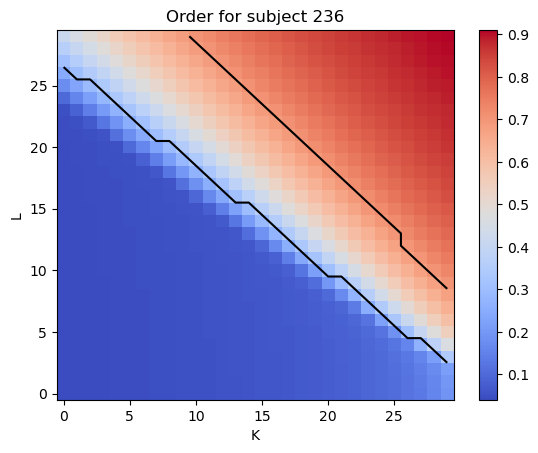

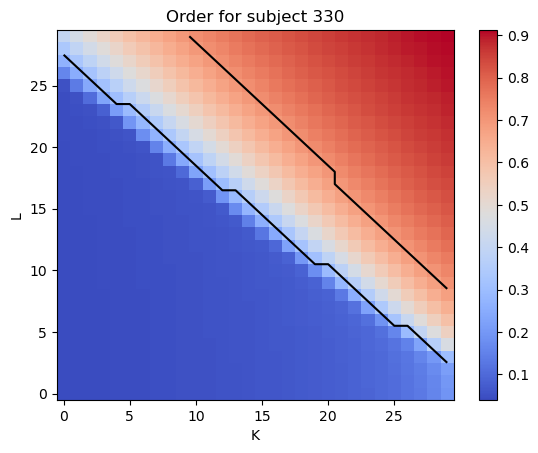

In [ ]:
# GP-width defined in 2D order plot
threshold_min = 0.3
threshold_max = 0.7

im = plt.imshow(np.mean(order_KL_114, axis=0).T, origin='lower', aspect='auto', cmap = 'coolwarm')
contours = (np.mean(order_KL_114, axis=0).T >= threshold_min) & (np.mean(order_KL_114, axis=0).T <= threshold_max)
plt.contour(contours, levels=[0.5], colors='black', linewidths=1.5)
plt.xlabel("K")
plt.ylabel("L")
plt.title("Order for subject 114")
plt.colorbar(im)
plt.show()
#print(f'GP-width as a fraction of pixels for sub 114 - {criticality_in_range_114}')

im = plt.imshow(np.mean(order_KL_236, axis=0).T, origin='lower', aspect='auto', cmap = 'coolwarm')
contours = (np.mean(order_KL_236, axis=0).T >= threshold_min) & (np.mean(order_KL_236, axis=0).T <= threshold_max)
plt.contour(contours, levels=[0.5], colors='black', linewidths=1.5)
plt.xlabel("K")
plt.ylabel("L")
plt.title("Order for subject 236")
plt.colorbar(im)
plt.show()
#print(f'GP-width as a fraction of pixels for sub 236 - {criticality_in_range_236}')

im = plt.imshow(np.mean(order_KL_330, axis=0).T, origin='lower', aspect='auto', cmap = 'coolwarm')
contours = (np.mean(order_KL_330, axis=0).T >= threshold_min) & (np.mean(order_KL_330, axis=0).T <= threshold_max)
plt.contour(contours, levels=[0.5], colors='black', linewidths=1.5)
plt.xlabel("K")
plt.ylabel("L")
plt.title("Order for subject 330")
plt.colorbar(im)
plt.show()
#print(f'GP-width as a fraction of pixels for sub 330 - {criticality_in_range_330}')

In [ ]:
# Count the number of pixels with order values within the range
num_pixels_in_range = np.sum((np.mean(order_KL_114, axis=0).T >= threshold_min) & (np.mean(order_KL_114, axis=0).T <= threshold_max))
total_pixels = np.mean(order_KL_114, axis=0).T.size
criticality_in_range_114 = num_pixels_in_range / total_pixels

num_pixels_in_range = np.sum((np.mean(order_KL_236, axis=0).T >= threshold_min) & (np.mean(order_KL_236, axis=0).T <= threshold_max))
total_pixels = np.mean(order_KL_236, axis=0).T.size
criticality_in_range_236 = num_pixels_in_range / total_pixels

num_pixels_in_range = np.sum((np.mean(order_KL_330, axis=0).T >= threshold_min) & (np.mean(order_KL_330, axis=0).T <= threshold_max))
total_pixels = np.mean(order_KL_330, axis=0).T.size
criticality_in_range_330 = num_pixels_in_range / total_pixels

print(f'GP-width as a fraction of pixels for sub 114 - {criticality_in_range_114}')
print(f'GP-width as a fraction of pixels for sub 236 - {criticality_in_range_236}')
print(f'GP-width as a fraction of pixels for sub 330 - {criticality_in_range_330}')

GP-width as a fraction of pixels for sub 114 - 0.23333333333333334
GP-width as a fraction of pixels for sub 236 - 0.2588888888888889
GP-width as a fraction of pixels for sub 330 - 0.24444444444444444


In [ ]:
# Same as above but with DFA
threshold = 0.6
num_pixels_in_range = np.sum((DFA_KL_114[1].T >= threshold))
total_pixels = DFA_KL_114[1].T.size
criticality_in_range_114 = num_pixels_in_range / total_pixels

num_pixels_in_range = np.sum((DFA_KL_236[1].T >= threshold))
total_pixels = DFA_KL_236[1].T.size
criticality_in_range_236 = num_pixels_in_range / total_pixels

num_pixels_in_range = np.sum((DFA_KL_330[1].T >= threshold))
total_pixels = DFA_KL_330[1].T.size
criticality_in_range_330 = num_pixels_in_range / total_pixels

print(f'GP-width as a fraction of pixels for sub 114 - {criticality_in_range_114}')
print(f'GP-width as a fraction of pixels for sub 236 - {criticality_in_range_236}')
print(f'GP-width as a fraction of pixels for sub 330 - {criticality_in_range_330}')

GP-width as a fraction of pixels for sub 114 - 0.013333333333333334
GP-width as a fraction of pixels for sub 236 - 0.0044444444444444444
GP-width as a fraction of pixels for sub 330 - 0.015555555555555555


In [ ]:
# GP-width for all subjects with 2D order plot
#print(order_KL.shape)
# Thresholds
threshold_min = 0.3
threshold_max = 0.7
gp_widths_all = []
for id in range(order_KL.shape[0]):
    num_pixels_in_range_order = np.sum((order_KL[id] >= threshold_min) & (order_KL[id] <= threshold_max))
    total_pixels_order = order_KL[id].size
    gp_width_range_order = num_pixels_in_range_order / total_pixels_order
    gp_widths_all.append(gp_width_range_order)
gp_widths_all = np.array(gp_widths_all)
print(gp_widths_all.shape)
print(gp_widths_all)

(86,)
[0.25222222 0.25222222 0.26       0.25       0.25       0.24555556
 0.24888889 0.29       0.23888889 0.25444444 0.24777778 0.23666667
 0.24111111 0.23333333 0.24888889 0.24888889 0.25222222 0.25555556
 0.24555556 0.24777778 0.25444444 0.24555556 0.24444444 0.24333333
 0.25222222 0.24888889 0.25888889 0.24333333 0.26222222 0.23888889
 0.25888889 0.25777778 0.24888889 0.25333333 0.26444444 0.26777778
 0.24777778 0.24444444 0.24777778 0.25444444 0.25222222 0.24444444
 0.24333333 0.26111111 0.25111111 0.23666667 0.25333333 0.25222222
 0.24444444 0.24444444 0.25111111 0.24       0.23888889 0.24666667
 0.24777778 0.25       0.24777778 0.26888889 0.24666667 0.25888889
 0.24777778 0.25555556 0.25555556 0.23777778 0.27222222 0.25111111
 0.23888889 0.25111111 0.26777778 0.24444444 0.26222222 0.25555556
 0.25111111 0.26       0.24333333 0.26111111 0.25111111 0.24111111
 0.25222222 0.24333333 0.25555556 0.25333333 0.25666667 0.25555556
 0.24888889 0.25333333]


In [ ]:
print(DFA_KL.shape)
threshold = 0.6
gp_w = []
for id in range(DFA_KL.shape[0]):
    num_pixels_in_range_dfa = np.sum((DFA_KL[id] >= threshold) & (DFA_KL[id] <= 0.8))
    total_pixels_dfa = DFA_KL[id].size
    gp_width_ridge = num_pixels_in_range / total_pixels
    gp_w.append(gp_width_ridge)
gp_w = np.array(gp_width_ridge)
print(gp_w.shape)
print(gp_w)

(86, 30, 30)
()
0.008888888888888889


(6, 3)
[[-0.4124042  -0.0744301   0.21498691]
 [ 0.2504942   0.07483173 -0.19817751]
 [ 0.26773457 -0.22131136 -0.14662959]
 [ 0.42332486  0.09991273 -0.20441107]
 [-0.03210451 -0.12924209 -0.17244871]
 [-0.42332486 -0.09991273  0.20441107]]


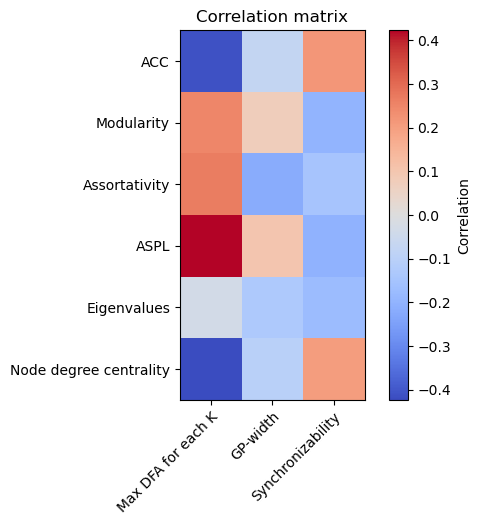

(6, 3)
[[7.95896030e-05 4.95819770e-01 4.68291486e-02]
 [2.00071402e-02 4.93490829e-01 6.73820964e-02]
 [1.26949458e-02 4.05803570e-02 1.77921244e-01]
 [4.88673769e-05 3.60040846e-01 5.90423904e-02]
 [7.69182819e-01 2.35628190e-01 1.12344713e-01]
 [4.88673769e-05 3.60040846e-01 5.90423904e-02]]


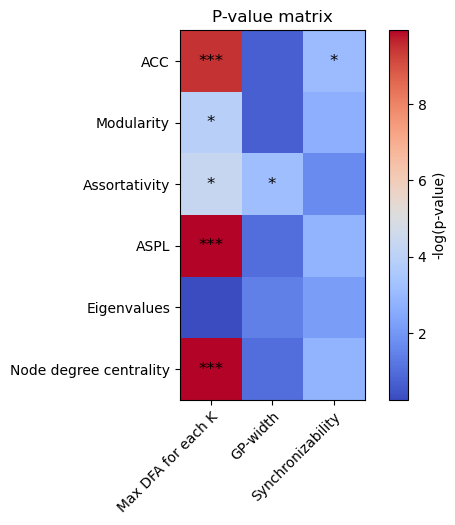

In [ ]:
# Heatmap visualization

# Calculated network metrics: assortativity, average shortest path length, modularities,
# average clustering coefficient, eigenvalues, node degree centrality

# Calculated criticality metrics: Maximum DFA for each K, GP-width, synchronizability

# Correlation matrix
criticality_metrics = np.array([[max_dfa_per_k], [gp_widths_all], [synchronizabilities]])
network_metrics = np.array([[avg_clustering_coeffs], [modularities], [assortativity], [path_length], [mean_eigvals], [mean_node_degree_centrality]])

# Remove the extra dimensions using np.squeeze
criticality_metrics = np.squeeze(criticality_metrics)
network_metrics = np.squeeze(network_metrics)

correlation_matrix = np.empty((network_metrics.shape[0], criticality_metrics.shape[0]))
p_value_matrix = np.empty((network_metrics.shape[0], criticality_metrics.shape[0]))

for i in range(network_metrics.shape[0]): 
    for j in range(criticality_metrics.shape[0]):  
        correlation_coefficient, p_value = stats.pearsonr(network_metrics[i], criticality_metrics[j])
        correlation_matrix[i, j] = correlation_coefficient
        p_value_matrix[i, j] = p_value
print(correlation_matrix.shape)
print(correlation_matrix)

fig, ax = plt.subplots()
im = ax.imshow(correlation_matrix, cmap='coolwarm', vmin = np.min(correlation_matrix), vmax = np.max(correlation_matrix))

ax.set_xticks(np.arange(criticality_metrics.shape[0]))
ax.set_yticks(np.arange(network_metrics.shape[0]))

ax.set_xticklabels(['Max DFA for each K', 'GP-width', 'Synchronizability'])
ax.set_yticklabels(['ACC', 'Modularity', 'Assortativity', 'ASPL', 'Eigenvalues', 'Node degree centrality'])

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

cbar = ax.figure.colorbar(im, ax=ax, label='Correlation')
ax.set_title('Correlation matrix')
plt.show()

# P-values
print(p_value_matrix.shape)
print(p_value_matrix)
fig, ax = plt.subplots()
im = ax.imshow(-np.log(p_value_matrix), cmap='coolwarm')
ax.set_xticks(np.arange(criticality_metrics.shape[0]))
ax.set_yticks(np.arange(network_metrics.shape[0]))

ax.set_xticklabels(['Max DFA for each K', 'GP-width', 'Synchronizability'])
ax.set_yticklabels(['ACC', 'Modularity', 'Assortativity', 'ASPL', 'Eigenvalues', 'Node degree centrality'])
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Add significant markers based on log-scale p-values
for i in range(network_metrics.shape[0]):
    for j in range(criticality_metrics.shape[0]):
        p_value = p_value_matrix[i, j]
        if p_value < 0.001:
            ax.text(j, i, '***', ha='center', va='center', color='black', fontsize=12)
        elif p_value < 0.01:
            ax.text(j, i, '**', ha='center', va='center', color='black', fontsize=12)
        elif p_value < 0.05:
            ax.text(j, i, '*', ha='center', va='center', color='black', fontsize=12)

cbar = ax.figure.colorbar(im, ax=ax, label='-log(p-value)')

ax.set_title('P-value matrix')
plt.show()

Fraction of pixels above 0.55 for subject 041: 0.0077777777777777776


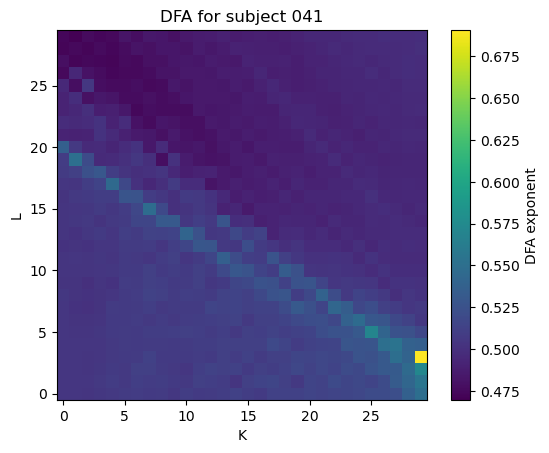

Fraction of pixels above 0.55 for subject 079: 0.01


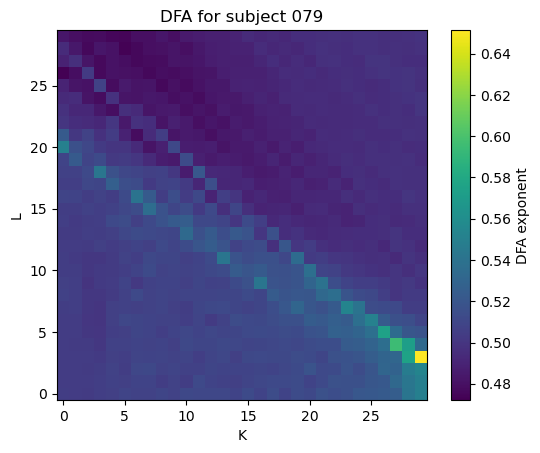

Fraction of pixels above 0.55 for subject 114: 0.03777777777777778


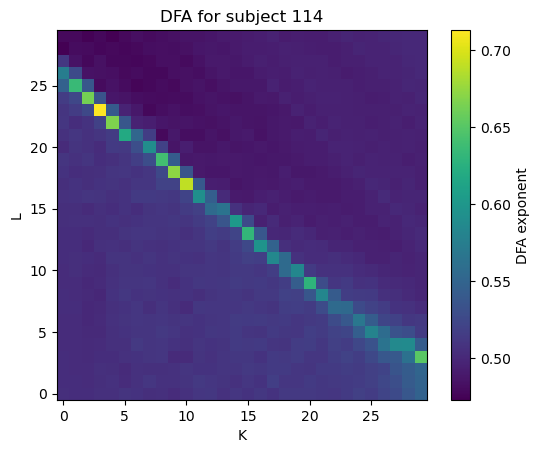

Fraction of pixels above 0.55 for subject 122: 0.012222222222222223


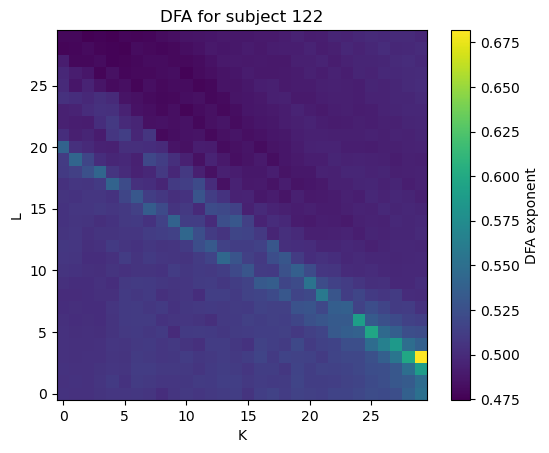

Fraction of pixels above 0.55 for subject 156: 0.022222222222222223


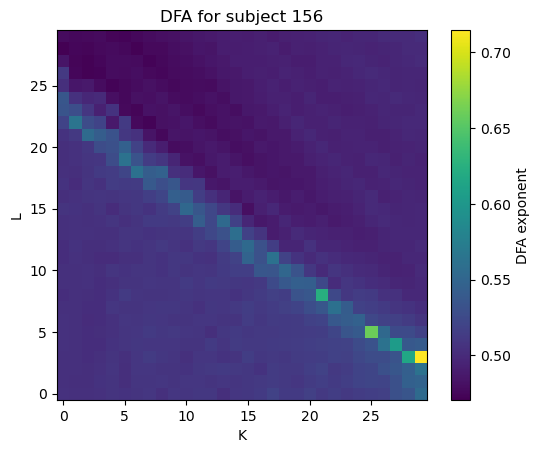

Fraction of pixels above 0.55 for subject 184: 0.014444444444444444


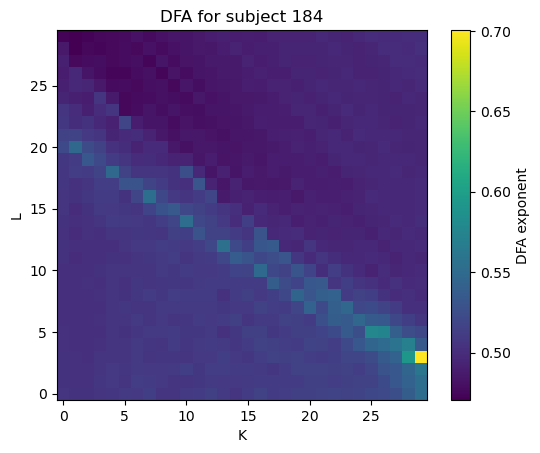

Fraction of pixels above 0.55 for subject 210: 0.03666666666666667


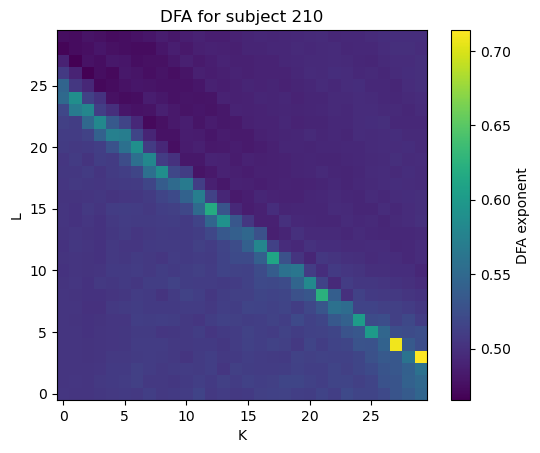

Fraction of pixels above 0.55 for subject 236: 0.03777777777777778


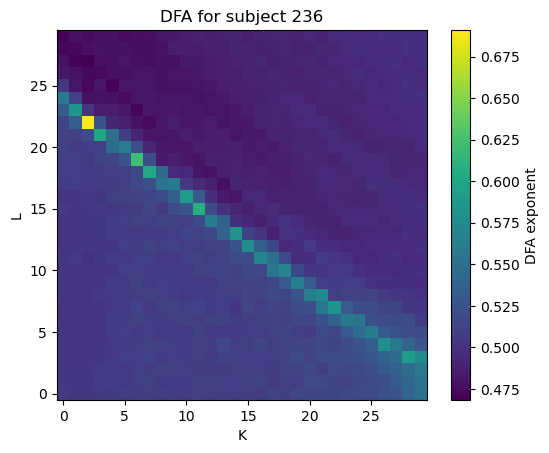

Fraction of pixels above 0.55 for subject 240: 0.043333333333333335


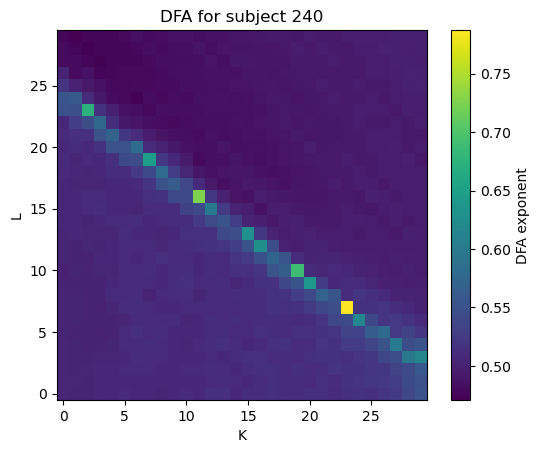

Fraction of pixels above 0.55 for subject 254: 0.051111111111111114


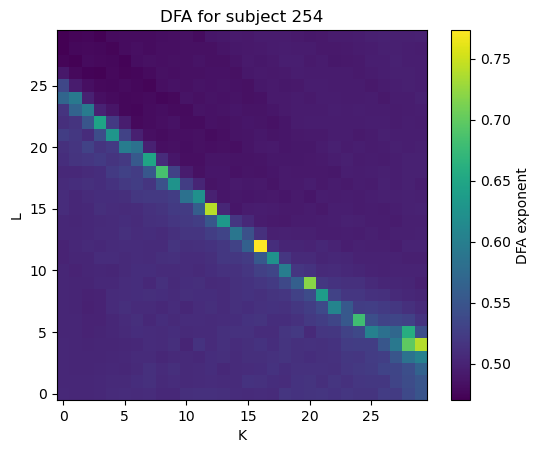

Fraction of pixels above 0.55 for subject 282: 0.034444444444444444


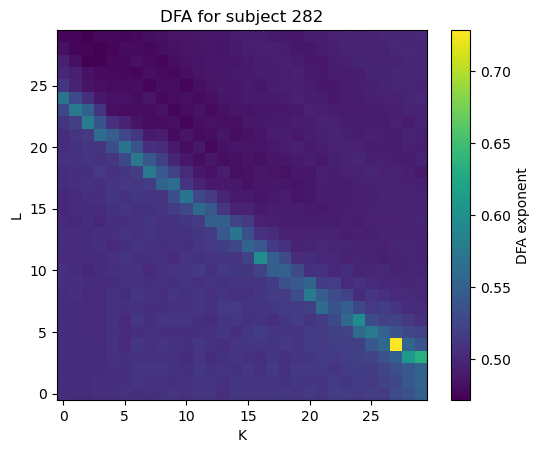

Fraction of pixels above 0.55 for subject 303: 0.01888888888888889


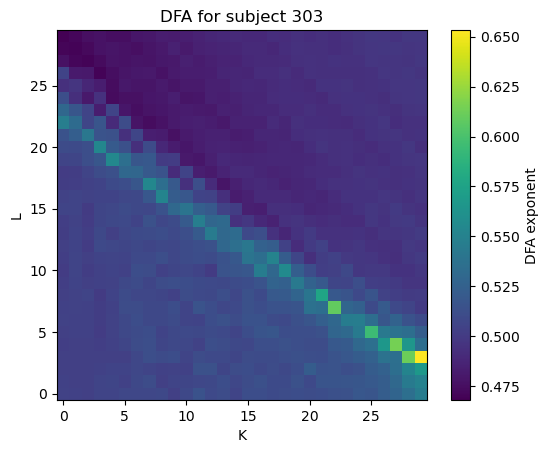

Fraction of pixels above 0.55 for subject 330: 0.03777777777777778


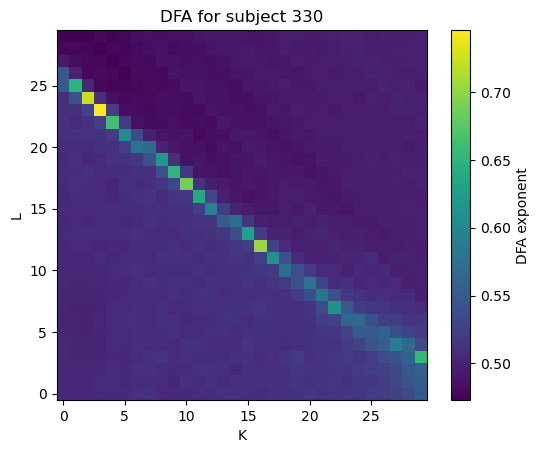

Fraction of pixels above 0.55 for subject 368: 0.023333333333333334


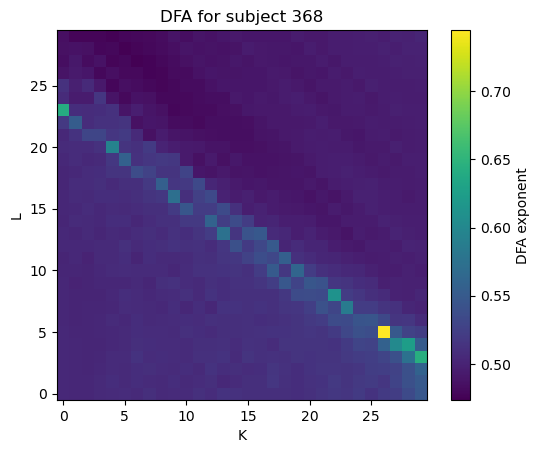

Fraction of pixels above 0.55 for subject 449: 0.022222222222222223


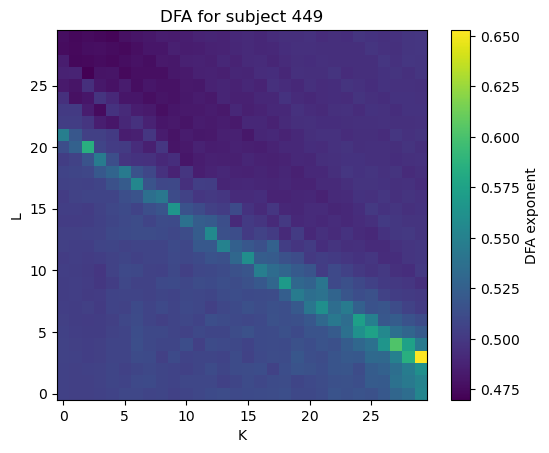

Fraction of pixels above 0.55 for subject 480: 0.035555555555555556


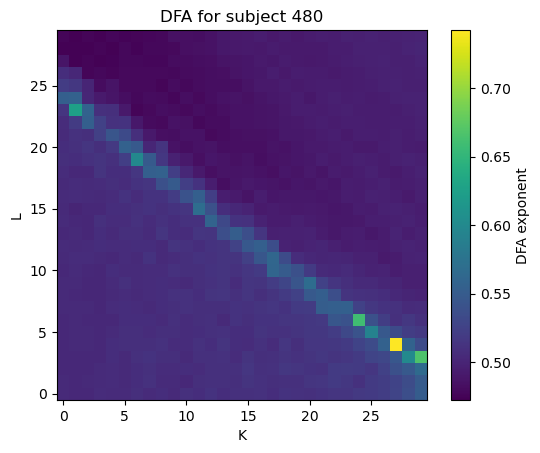

Fraction of pixels above 0.55 for subject 621: 0.02


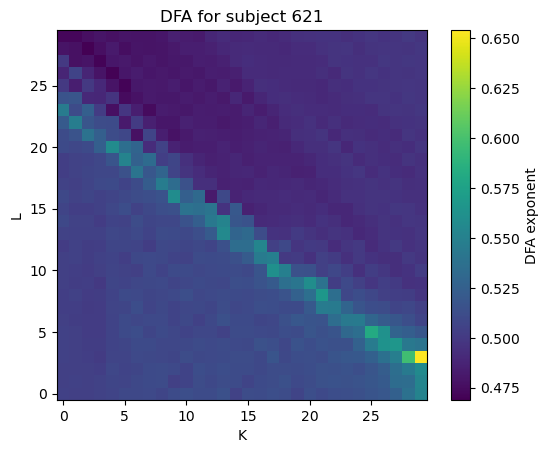

Fraction of pixels above 0.55 for subject 623: 0.034444444444444444


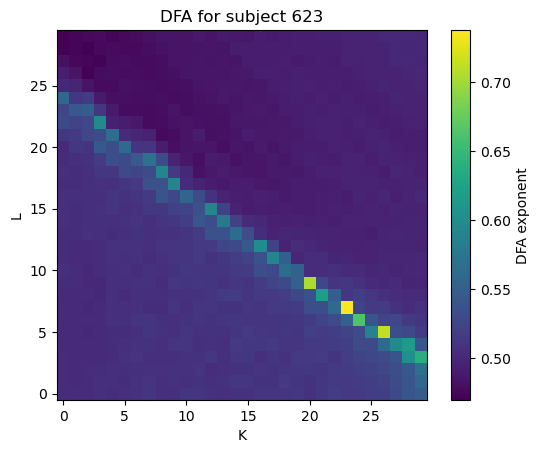

Fraction of pixels above 0.55 for subject 646: 0.013333333333333334


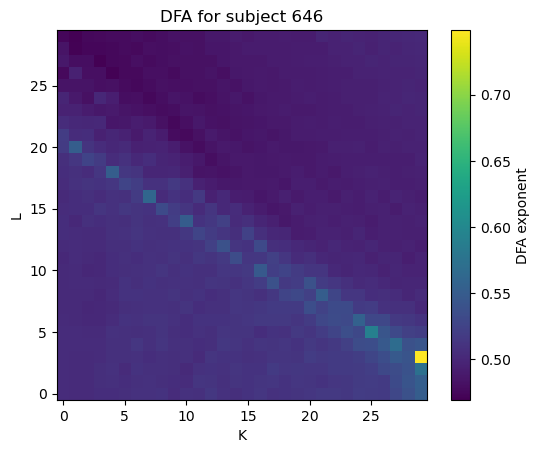

Fraction of pixels above 0.55 for subject 661: 0.005555555555555556


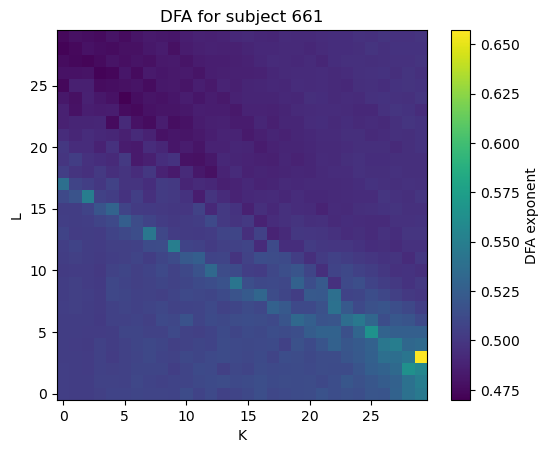

Fraction of pixels above 0.55 for subject 676: 0.015555555555555555


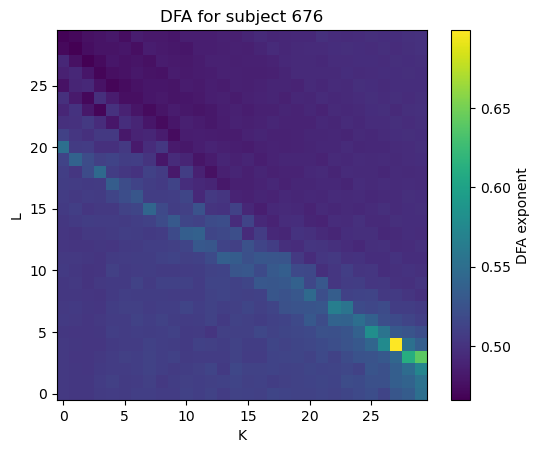

Fraction of pixels above 0.55 for subject 695: 0.03666666666666667


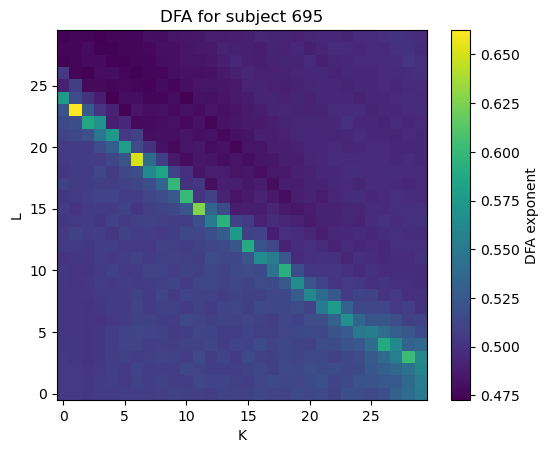

Fraction of pixels above 0.55 for subject 714: 0.014444444444444444


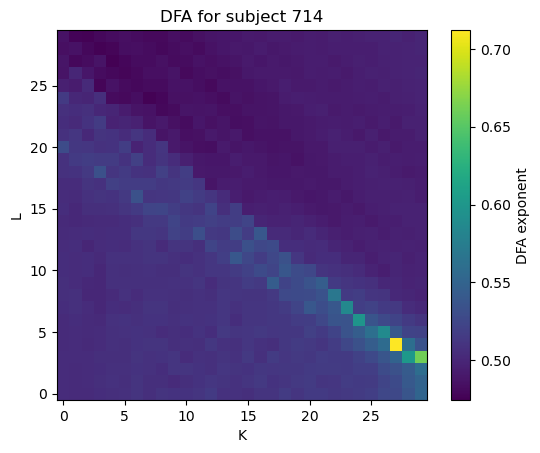

Fraction of pixels above 0.55 for subject 781: 0.017777777777777778


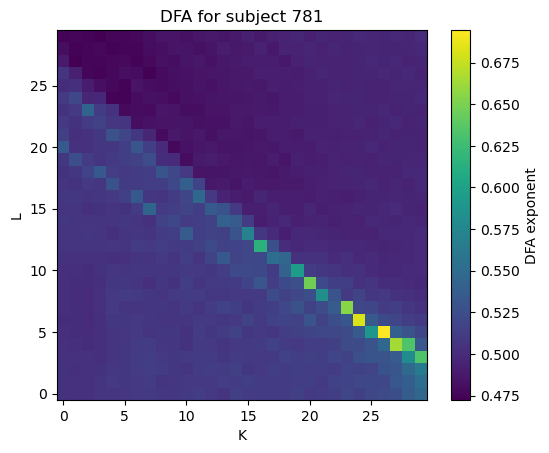

In [5]:
#All DFAs for subjects
clinical_ids = np.load('clinical_ids.npy')
for i, id in enumerate(clinical_ids):
    DFA_subject = DFA_KL_86[i, :, :] 
    if np.max(DFA_subject) > 0.65: 
        pixels = DFA_subject.size  
        dfa = DFA_subject
        fraction_dfa = dfa > 0.55
        fraction_above_55 = np.sum(fraction_dfa) / pixels  
        print(f"Fraction of pixels above 0.55 for subject {id}: {fraction_above_55}")
        plt.figure()
        im = plt.imshow(dfa.T, origin='lower')
        plt.xlabel("K")
        plt.ylabel("L")
        plt.title(f"DFA for subject {id}")
        plt.colorbar(im, label='DFA exponent')
        plt.show()

In [6]:
clinical_ids = np.load('clinical_ids.npy')
order_KL_006 = np.empty((86, 30, 30))
PLV_KL_006 = np.empty((86, 30, 30))
DFA_KL_006 = np.empty((86, 30, 30))
sd_KL_006 = np.empty((86, 30, 30))

for i, n in enumerate(clinical_ids):
    for k in range(1, 31):
        for l in range(1, 31):
            DFA_KL_006[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/subs_log/sub-006/sub-006_K-{k}_L-{l}_dfa.npy"))
            PLV_KL_006[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/subs_log/sub-006/sub-006_K-{k}_L-{l}_plv.npy"))
            order_KL_006[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/subs_log/sub-006/sub-006_K-{k}_L-{l}_order.npy"))
            sd_KL_006[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/subs_log/sub-006/sub-006_K-{k}_L-{l}_std.npy"))

clinical_ids = np.load('clinical_ids.npy')
order_KL_006_t = np.empty((86, 30, 30))
PLV_KL_006_t = np.empty((86, 30, 30))
DFA_KL_006_t = np.empty((86, 30, 30))
sd_KL_006_t = np.empty((86, 30, 30))

for i, n in enumerate(clinical_ids):
    for k in range(1, 31):
        for l in range(1, 31):
            DFA_KL_006_t[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-006/sub-006_K-{k}_L-{l}_dfa.npy"))
            PLV_KL_006_t[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-006/sub-006_K-{k}_L-{l}_plv.npy"))
            order_KL_006_t[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-006/sub-006_K-{k}_L-{l}_order.npy"))
            sd_KL_006_t[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-006/sub-006_K-{k}_L-{l}_std.npy"))

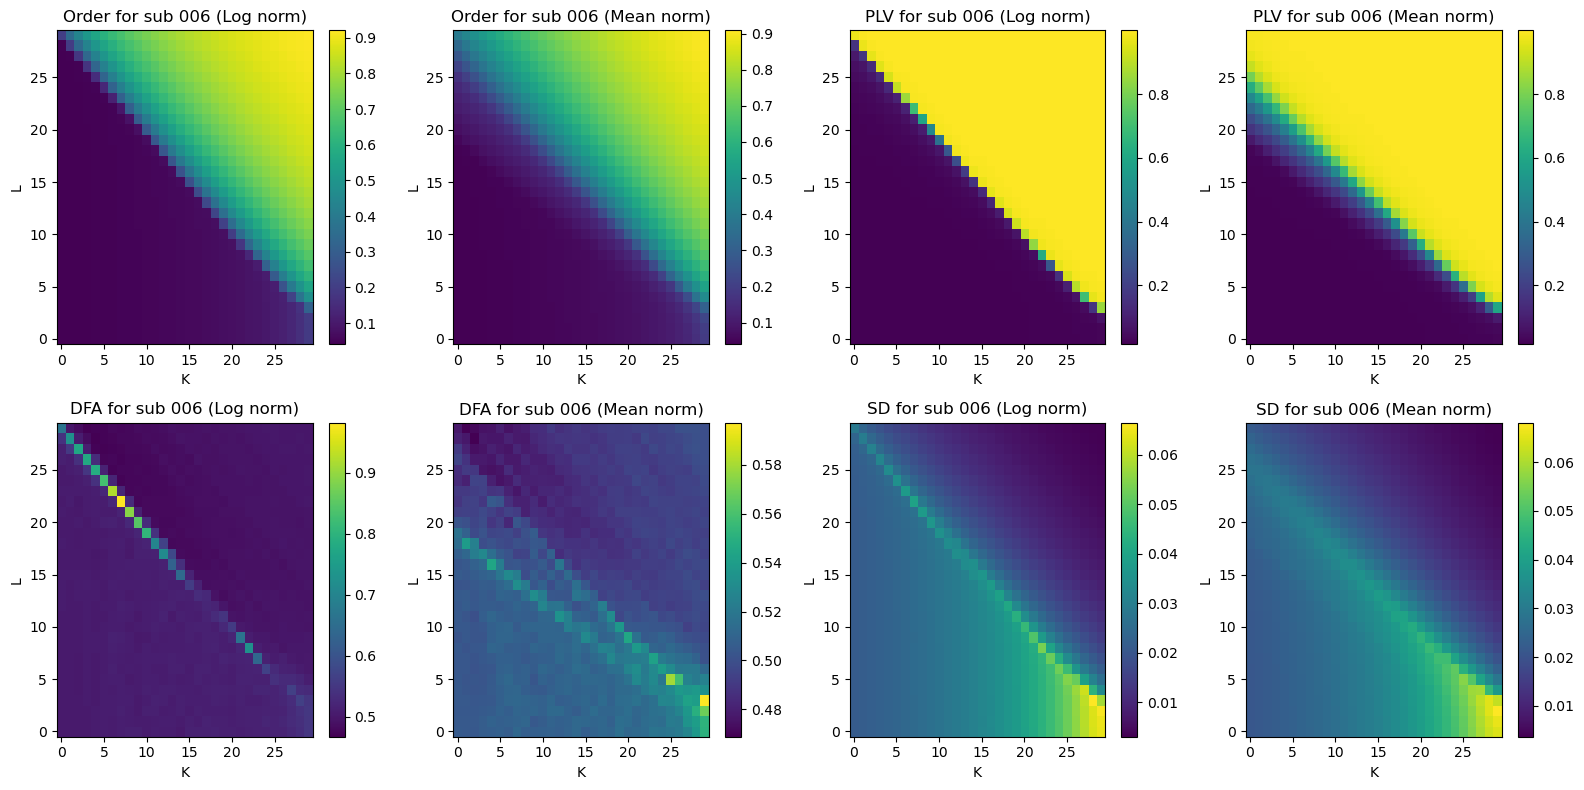

In [7]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

im_order_original = axs[0, 0].imshow(np.mean(order_KL_006, axis=0).T, origin='lower', aspect='auto')
axs[0, 0].set_xlabel("K")
axs[0, 0].set_ylabel("L")
axs[0, 0].set_title("Order for sub 006 (Log norm)")
fig.colorbar(im_order_original, ax=axs[0, 0])

im_order_transformed = axs[0, 1].imshow(np.mean(order_KL_006_t, axis=0).T, origin='lower', aspect='auto')
axs[0, 1].set_xlabel("K")
axs[0, 1].set_ylabel("L")
axs[0, 1].set_title("Order for sub 006 (Mean norm)")
fig.colorbar(im_order_transformed, ax=axs[0, 1])

im_plv_original = axs[0, 2].imshow(PLV_KL_006[1].T, origin='lower', aspect='auto')
axs[0, 2].set_xlabel("K")
axs[0, 2].set_ylabel("L")
axs[0, 2].set_title("PLV for sub 006 (Log norm)")
fig.colorbar(im_plv_original, ax=axs[0, 2])

im_plv_transformed = axs[0, 3].imshow(PLV_KL_006_t[1].T, origin='lower', aspect='auto')
axs[0, 3].set_xlabel("K")
axs[0, 3].set_ylabel("L")
axs[0, 3].set_title("PLV for sub 006 (Mean norm)")
fig.colorbar(im_plv_transformed, ax=axs[0, 3])

im_dfa_original = axs[1, 0].imshow(DFA_KL_006[1].T, origin='lower', aspect='auto')
axs[1, 0].set_xlabel("K")
axs[1, 0].set_ylabel("L")
axs[1, 0].set_title("DFA for sub 006 (Log norm)")
fig.colorbar(im_dfa_original, ax=axs[1, 0])

im_dfa_transformed = axs[1, 1].imshow(DFA_KL_006_t[1].T, origin='lower', aspect='auto')
axs[1, 1].set_xlabel("K")
axs[1, 1].set_ylabel("L")
axs[1, 1].set_title("DFA for sub 006 (Mean norm)")
fig.colorbar(im_dfa_transformed, ax=axs[1, 1])

im_sd_original = axs[1, 2].imshow(np.mean(sd_KL_006, axis=0).T, origin='lower', aspect='auto')
axs[1, 2].set_xlabel("K")
axs[1, 2].set_ylabel("L")
axs[1, 2].set_title("SD for sub 006 (Log norm)")
fig.colorbar(im_sd_original, ax=axs[1, 2])

im_sd_transformed = axs[1, 3].imshow(np.mean(sd_KL_006_t, axis=0).T, origin='lower', aspect='auto')
axs[1, 3].set_xlabel("K")
axs[1, 3].set_ylabel("L")
axs[1, 3].set_title("SD for sub 006 (Mean norm)")
fig.colorbar(im_sd_transformed, ax=axs[1, 3])

plt.tight_layout()
plt.show()

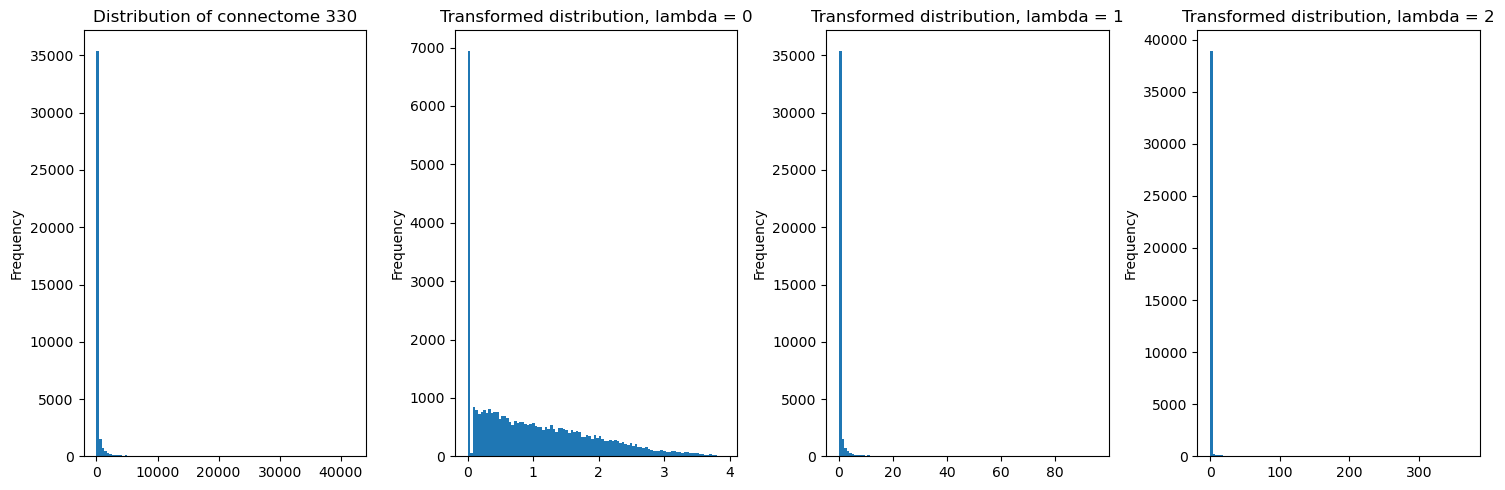

2


In [2]:
# Box cox transformation to connectomes
id = 330
subject_path_330 = f'/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/sub-CON{id}_yeo17_200Parcels_for_fit'
subject_330 = pickle.load(open(subject_path_330, 'rb'))
original_connectome = subject_330['connectome'].flatten()

plt.figure(figsize=(15, 5)) 
plt.subplot(1, 4, 1)
plt.hist(original_connectome, bins=100)
plt.ylabel('Frequency')
plt.title('Distribution of connectome 330')

for lmbda in range(3):
    boxcox_transformed = stats.boxcox(original_connectome + 1, lmbda=lmbda)
    connectome_normed = boxcox_transformed / boxcox_transformed.mean()

    plt.subplot(1, 4, lmbda + 2)
    plt.hist(connectome_normed, bins=100)
    plt.title(f'Transformed distribution, lambda = {lmbda}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [10]:
DFA_236_boxcox = np.empty((15,10))
PLV_236_boxcox = np.empty((15,10))
order_236_boxcox = np.empty((15,10))
sd_236_boxcox = np.empty((15,10))
lambda_values = np.linspace(0.5, 1.5, 10)
for k in range(1,16):
    for i,lmbda in enumerate(lambda_values):
        DFA_236_boxcox[k-1, i] = np.mean(np.load(f'/m/nbe/scratch/leap_mcpsych/Aleksi/boxcox/sub-236/sub-236_K-{k}_L-20_lambda-{lmbda}_dfa.npy'))
        PLV_236_boxcox[k-1, i] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/boxcox/sub-236/sub-236_K-{k}_L-20_lambda-{lmbda}_plv.npy"))
        order_236_boxcox[k-1, i] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/boxcox/sub-236/sub-236_K-{k}_L-20_lambda-{lmbda}_order.npy"))
        sd_236_boxcox[k-1, i] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/boxcox/sub-236/sub-236_K-{k}_L-20_lambda-{lmbda}_std.npy"))

(15, 10)


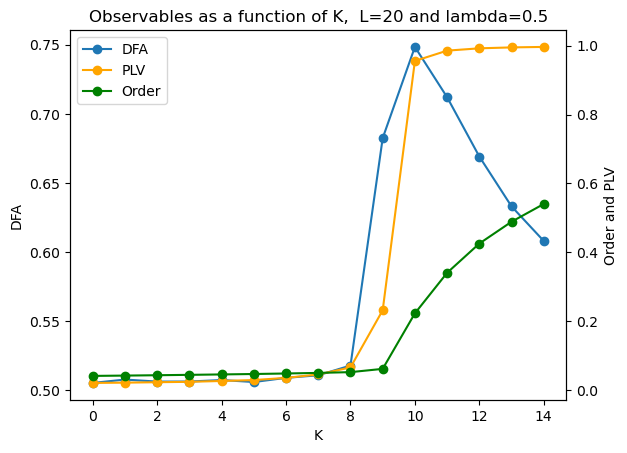

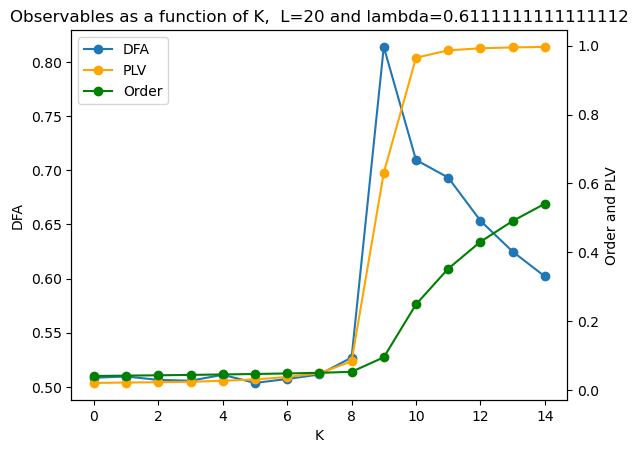

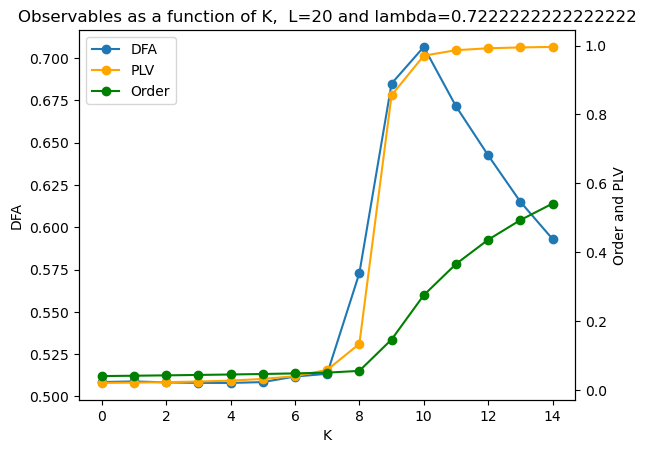

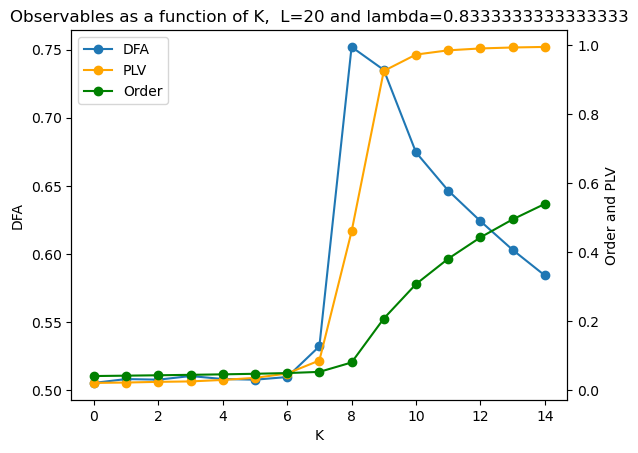

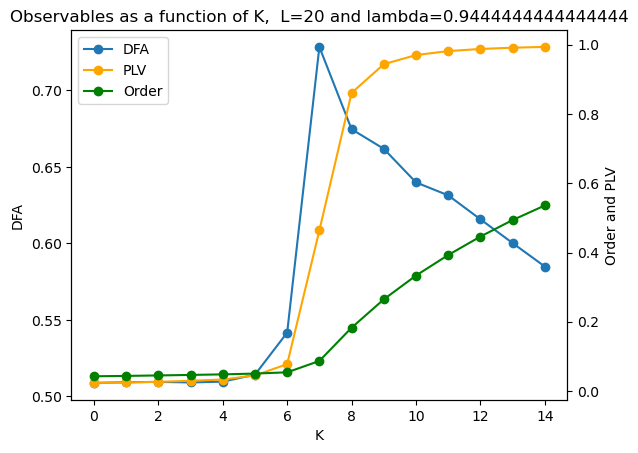

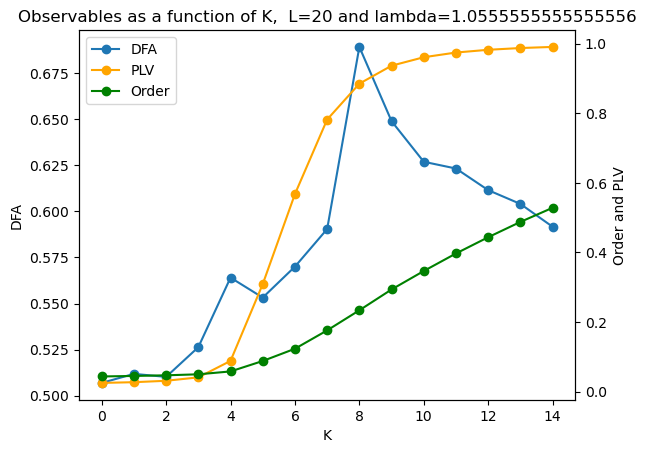

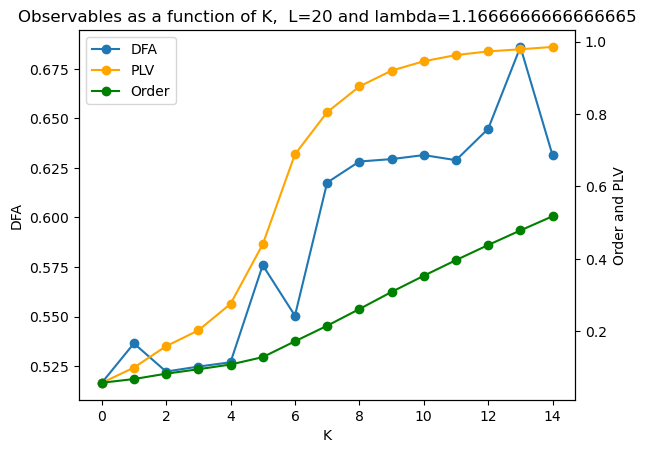

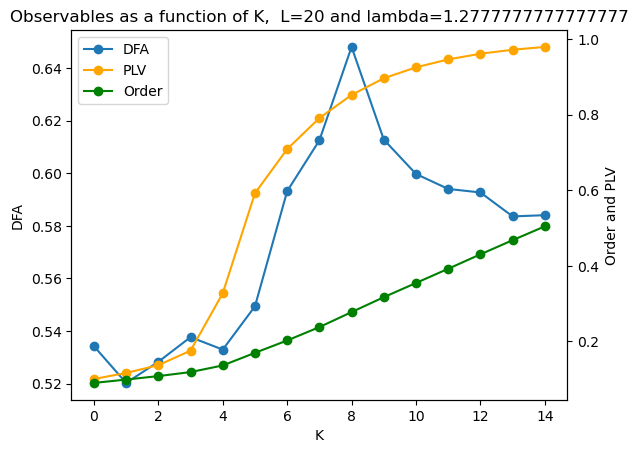

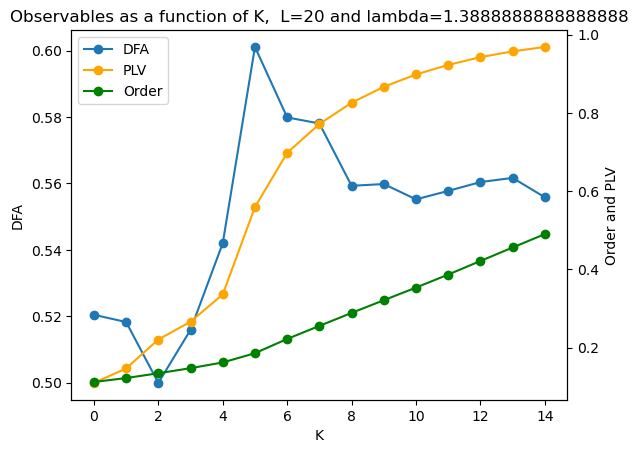

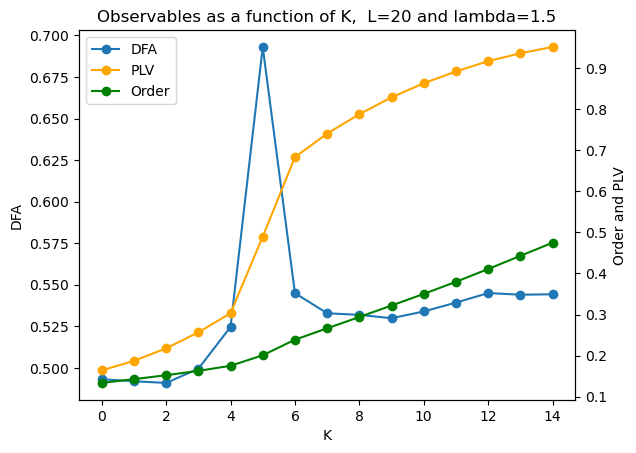

In [11]:
print(DFA_236_boxcox.shape)

for i, lmbda in enumerate(lambda_values):
    fig, ax1 = plt.subplots()
    L_val = 20
    ax1.plot(DFA_236_boxcox[:, i], '-o', label='DFA')
    ax1.set_xlabel('K')
    ax1.set_ylabel('DFA')

    ax2 = ax1.twinx()
    ax2.plot(PLV_236_boxcox[:, i], '-o',  color='orange', label='PLV')
    ax2.plot(order_236_boxcox[:, i], '-o',  color='green', label='Order')
    ax2.set_ylabel('Order and PLV')


    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    lines = lines_1 + lines_2
    labels = labels_1 + labels_2
    ax1.legend(lines, labels, loc='upper left')

    ax1.set_title(f'Observables as a function of K,  L={L_val} and lambda={lmbda}')
    ax1.set_xlabel('K')
    ax1.set_ylabel('DFA')
    plt.show()

GP widths for subjects [236] (L = 14) are [7.256948647218778]


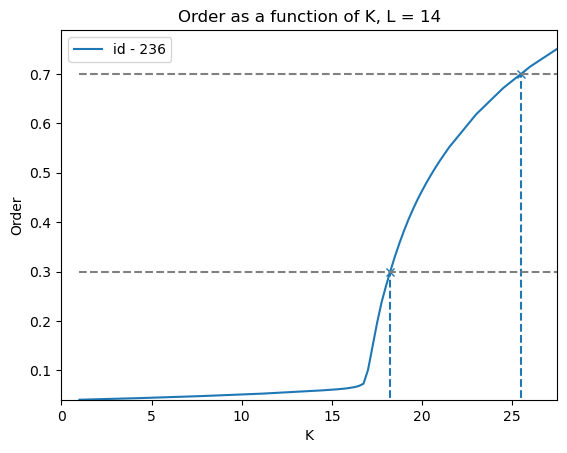

In [88]:
# First aspect to operationalize GP-width (done for all subs also in analysis.ipynb)
L_val = 14
sub_list = [236]
order_subs = [order_KL_236_exp1]
# Constant over subjects, define once
k1 = np.linspace(15,21,25)
k2 = np.linspace(1,14.5,5)
k3 = np.linspace(21.5,27.5,5)
k = np.concatenate((k1,k2,k3))
k_values = np.sort(k)

ord_min = 0.3
ord_max = 0.7

# Any cmap goes, it's needed to match plot colors
cmap = plt.colormaps["tab20"](np.arange(0, len(order_subs)))
# Find function K(Order) !!
interpolated = [sc.interpolate.interp1d(order, k_values) for order in order_subs]
ynew = [ord_min, ord_max]

fig, ax = plt.subplots()
for i, interpol in enumerate(interpolated):
    ax.plot(interpol(ynew), ynew, 'x', color=cmap[i])
    ax.vlines(x=interpol(ynew), ymin=0, ymax=ynew, color=cmap[i], linestyle='--')
    ax.plot(k_values, order_subs[i], color=cmap[i], label=f'id - {sub_list[i]}')
    
# Order limits
ax.hlines(y=ynew, xmin=min(k_values), xmax=max(k_values), color='grey', linestyle='--')

# Limits to make things look nice
ax.set_ylim(min(order_subs[i]))
ax.set_xlim(0, max(k_values))
ax.set_xlabel('K')
ax.set_ylabel('Order')
ax.set_title(f'Order as a function of K, L = {L_val}')
ax.legend()
# Compute GP widths for each dataset
gp_widths = [interpol(ynew[1])-interpol(ynew[0]) for interpol in interpolated]

print(f'GP widths for subjects {sub_list} (L = {L_val}) are', gp_widths)

GP widths for subjects [236] (L = 14) are [5.025193398737546]


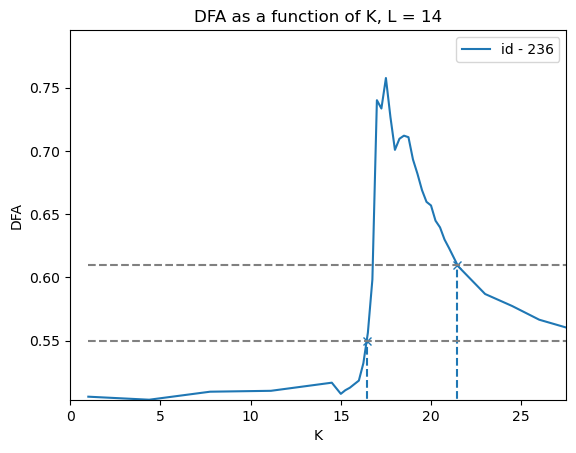

In [100]:
# First aspect to operationalize GP-width (done for all subs also in analysis.ipynb)
L_val = 14
sub_list = [236]
order_subs = [DFA_KL_236_exp1]
# Constant over subjects, define once
k1 = np.linspace(15,21,25)
k2 = np.linspace(1,14.5,5)
k3 = np.linspace(21.5,27.5,5)
k = np.concatenate((k1,k2,k3))
k_values = np.sort(k)

ord_min = 0.55
ord_max = 0.61

# Any cmap goes, it's needed to match plot colors
cmap = plt.colormaps["tab20"](np.arange(0, len(order_subs)))
# Find function K(Order) !!
interpolated = [sc.interpolate.interp1d(order, k_values) for order in order_subs]
ynew = [ord_min, ord_max]

fig, ax = plt.subplots()
for i, interpol in enumerate(interpolated):
    ax.plot(interpol(ynew), ynew, 'x', color=cmap[i])
    ax.vlines(x=interpol(ynew), ymin=0, ymax=ynew, color=cmap[i], linestyle='--')
    ax.plot(k_values, order_subs[i], color=cmap[i], label=f'id - {sub_list[i]}')
    
# Order limits
ax.hlines(y=ynew, xmin=min(k_values), xmax=max(k_values), color='grey', linestyle='--')

# Limits to make things look nice
ax.set_ylim(min(order_subs[i]))
ax.set_xlim(0, max(k_values))
ax.set_xlabel('K')
ax.set_ylabel('DFA')
ax.set_title(f'DFA as a function of K, L = {L_val}')
ax.legend()
# Compute GP widths for each dataset
gp_widths = [interpol(ynew[1])-interpol(ynew[0]) for interpol in interpolated]

print(f'GP widths for subjects {sub_list} (L = {L_val}) are', gp_widths)

In [3]:
clinical_ids = np.load('clinical_ids.npy')
order_KL_1 = np.empty((86, 30, 30))
PLV_KL_1 = np.empty((86, 30, 30))
DFA_KL_1 = np.empty((86, 30, 30))
sd_KL_1 = np.empty((86, 30, 30))

id = 254
for i, n in enumerate(clinical_ids):
    for k in range(1, 31):
        for l in range(1, 31):
            DFA_KL_1[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_dfa.npy"))
            PLV_KL_1[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_plv.npy"))
            order_KL_1[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_order.npy"))
            sd_KL_1[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_std.npy"))

order_KL_2 = np.empty((86, 30, 30))
PLV_KL_2 = np.empty((86, 30, 30))
DFA_KL_2 = np.empty((86, 30, 30))
sd_KL_2 = np.empty((86, 30, 30))

id = 330
for i, n in enumerate(clinical_ids):
    for k in range(1, 31):
        for l in range(1, 31):
            DFA_KL_2[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_dfa.npy"))
            PLV_KL_2[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_plv.npy"))
            order_KL_2[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_order.npy"))
            sd_KL_2[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_std.npy"))

order_KL_3 = np.empty((86, 30, 30))
PLV_KL_3 = np.empty((86, 30, 30))
DFA_KL_3 = np.empty((86, 30, 30))
sd_KL_3 = np.empty((86, 30, 30))

id = 781
for i, n in enumerate(clinical_ids):
    for k in range(1, 31):
        for l in range(1, 31):
            DFA_KL_3[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_dfa.npy"))
            PLV_KL_3[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_plv.npy"))
            order_KL_3[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_order.npy"))
            sd_KL_3[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/sub-{id}/sub-{id}_K-{k}_L-{l}_std.npy"))

In [4]:
id = 254
clinical_ids = np.load('clinical_ids.npy')
subject_path_1 = f'/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/sub-CON{id}_yeo17_200Parcels_for_fit'
subject_1 = pickle.load(open(subject_path_1, 'rb'))
sc_254 = subject_1['connectome'] / np.mean(subject_1['connectome'])

id = 330
subject_path_2 = f'/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/sub-CON{id}_yeo17_200Parcels_for_fit'
subject_2 = pickle.load(open(subject_path_2, 'rb'))
sc_330 = subject_2['connectome'] / np.mean(subject_2['connectome'])

id = 781
subject_path_3 = f'/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/sub-CON{id}_yeo17_200Parcels_for_fit'
subject_3 = pickle.load(open(subject_path_3, 'rb'))
sc_781 = subject_3['connectome'] / np.mean(subject_3['connectome'])

The most critical point in DFA for subject 254 - (16, 12)
The value of the most critical point - 0.7732898673136178
Number of KL-pairs in critical ridge in DFA - 46
Mean DFA scaling exponent of the top 5 percent of exponents - 0.6090699643137651

The most critical point in DFA for subject 330 - (3, 23)
The value of the most critical point - 0.7455905608583154
Number of KL-pairs in critical ridge in DFA - 34
Mean DFA scaling exponent of the top 5 percent of exponents - 0.5888729376744058

The most critical point in DFA for subject 781 - (26, 5)
The value of the most critical point - 0.6944587067143685
Number of KL-pairs in critical ridge in DFA - 16
Mean DFA scaling exponent of the top 5 percent of exponents - 0.5648523557651208

Bias for sub 254: 23.726288400201444, slope: -0.7369691119691122
Bias for sub 330: 25.22060934758334, slope: -0.807066517785931
Bias for sub 781: 23.99758287292816, slope: -0.7472375690607731


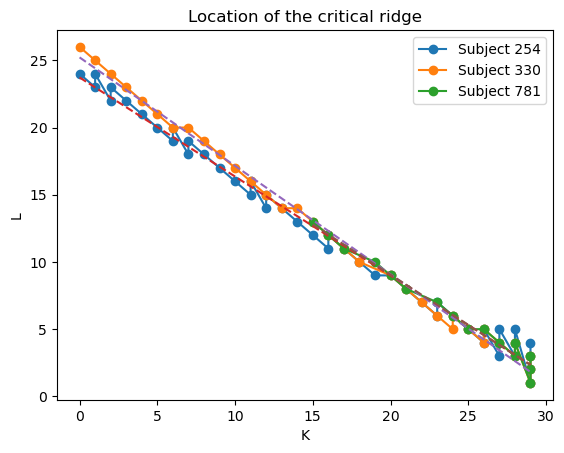

In [6]:
print(f'The most critical point in DFA for subject 254 - {np.unravel_index(DFA_KL_1[1].argmax(), DFA_KL_1[1].shape)}')
print(f'The value of the most critical point - {np.amax(DFA_KL_1[1])}')
critical_ridge1 = np.argwhere(DFA_KL_1[1]>0.55)
print(f'Number of KL-pairs in critical ridge in DFA - {critical_ridge1.shape[0]}')
flattened1 = np.ndarray.flatten(DFA_KL_1[1])
sorted1 = np.sort(flattened1[::-1])
top_5_exponents1 = sorted1[-45:]
mean_top_5_1 = np.mean(top_5_exponents1)
print(f'Mean DFA scaling exponent of the top 5 percent of exponents - {mean_top_5_1}\n')

print(f'The most critical point in DFA for subject 330 - {np.unravel_index(DFA_KL_2[1].argmax(), DFA_KL_2[1].shape)}')
print(f'The value of the most critical point - {np.amax(DFA_KL_2[1])}')
critical_ridge2 = np.argwhere(DFA_KL_2[1]>0.55)
print(f'Number of KL-pairs in critical ridge in DFA - {critical_ridge2.shape[0]}')
flattened2 = np.ndarray.flatten(DFA_KL_2[1])
sorted2 = np.sort(flattened2[::-1])
top_5_exponents2 = sorted2[-45:]
mean_top_5_2 = np.mean(top_5_exponents2)
print(f'Mean DFA scaling exponent of the top 5 percent of exponents - {mean_top_5_2}\n')

print(f'The most critical point in DFA for subject 781 - {np.unravel_index(DFA_KL_3[1].argmax(), DFA_KL_3[1].shape)}')
print(f'The value of the most critical point - {np.amax(DFA_KL_3[1])}')
critical_ridge3 = np.argwhere(DFA_KL_3[1]>0.55)
print(f'Number of KL-pairs in critical ridge in DFA - {critical_ridge3.shape[0]}')
flattened3 = np.ndarray.flatten(DFA_KL_3[1])
sorted3 = np.sort(flattened3[::-1])
top_5_exponents3 = sorted3[-45:]
mean_top_5_3 = np.mean(top_5_exponents3)
print(f'Mean DFA scaling exponent of the top 5 percent of exponents - {mean_top_5_3}')
L_val = 15

K_1 = critical_ridge1[:, 0]
L_1 = critical_ridge1[:, 1]
regression_coeffs_1 = np.polyfit(K_1, L_1, 1)
bias_1 = regression_coeffs_1[1]
slope_1 = regression_coeffs_1[0]

K_2 = critical_ridge2[:, 0]
L_2 = critical_ridge2[:, 1]
regression_coeffs_2 = np.polyfit(K_2, L_2, 1)
bias_2 = regression_coeffs_2[1]
slope_2 = regression_coeffs_2[0]

K_3 = critical_ridge3[:, 0]
L_3 = critical_ridge3[:, 1]
regression_coeffs_3 = np.polyfit(K_3, L_3, 1)
bias_3 = regression_coeffs_3[1]
slope_3 = regression_coeffs_3[0]

# Plot the critical ridge for all subjects
plt.plot(K_1, L_1, 'o-', label='Subject 254')
plt.plot(K_2, L_2, 'o-', label='Subject 330')
plt.plot(K_3, L_3, 'o-', label='Subject 781')

# Plot the regression lines
plt.plot(K_1, np.polyval(regression_coeffs_1, K_1), '--')
plt.plot(K_2, np.polyval(regression_coeffs_2, K_2), '--')
plt.plot(K_3, np.polyval(regression_coeffs_3, K_3), '--')

print()
print(f'Bias for sub 254: {bias_1}, slope: {slope_1}')
print(f'Bias for sub 330: {bias_2}, slope: {slope_2}')
print(f'Bias for sub 781: {bias_3}, slope: {slope_3}')

plt.xlabel('K')
plt.ylabel('L')
plt.title('Location of the critical ridge')
plt.legend()
plt.show()

In [51]:
def calculate_criticality_metrics(order_KL_list, DFA_KL_list, thresholds, biases):
    criticality_metrics = []
    
    for i, (order_KL, DFA_KL, threshold, bias) in enumerate(zip(order_KL_list, DFA_KL_list, thresholds, biases)):
        # GP-width calculations
        threshold_min = 0.1
        threshold_max = 0.3
        num_pixels_in_range_order = np.sum((np.mean(order_KL, axis=0).T >= threshold_min) & (np.mean(order_KL, axis=0).T <= threshold_max))
        total_pixels_order = np.mean(order_KL, axis=0).T.size
        criticality_in_range_order = num_pixels_in_range_order / total_pixels_order
        
        # DFA calculations
        num_pixels_in_range_dfa = np.sum((DFA_KL[1].T >= threshold))
        total_pixels_dfa = DFA_KL[1].T.size
        criticality_in_range_dfa = num_pixels_in_range_dfa / total_pixels_dfa
        
        max_dfa_per_k = np.max(DFA_KL, axis=(1, 2))[0]
        
        # Create the criticality metrics array
        criticality_metrics_sub = np.array([
            [max_dfa_per_k],
            [criticality_in_range_dfa],
            [criticality_in_range_order],
            [bias]
        ])
        
        criticality_metrics.append(criticality_metrics_sub)
    return criticality_metrics

# Example usage
order_KL_list = [order_KL_1, order_KL_2, order_KL_3]
DFA_KL_list = [DFA_KL_1, DFA_KL_2, DFA_KL_3]
thresholds = [0.55, 0.55, 0.55]  # Replace with your actual thresholds
biases = [bias_1, bias_2, bias_3]  # Replace with your actual biases

criticality_metrics = calculate_criticality_metrics(order_KL_list, DFA_KL_list, thresholds, biases)
criticality_metrics = np.array(criticality_metrics)
print(criticality_metrics.shape)
criticality_metrics = np.squeeze(criticality_metrics,axis=-1)
print(criticality_metrics.shape)
print(criticality_metrics)

(3, 4, 1)
(3, 4)
[[7.73289867e-01 5.11111111e-02 8.77777778e-02 2.37262884e+01]
 [7.45590561e-01 3.77777778e-02 7.44444444e-02 2.52206093e+01]
 [6.94458707e-01 1.77777778e-02 1.08888889e-01 2.39975829e+01]]


In [58]:
def calculate_metrics(graph):
    avg_clustering_coefficient = nx.average_clustering(graph)
    
    # Calculate modularity using Louvain community detection
    communities = nx.community.greedy_modularity_communities(graph)
    modularity = nx.community.modularity(graph, communities)
    
    assortativity = nx.degree_assortativity_coefficient(graph)
    avg_shortest_path_length = nx.average_shortest_path_length(graph)
    
    eigenvalues = np.mean(np.linalg.eigvals(nx.to_numpy_array(graph)))
    node_degree_centrality = np.mean(list(nx.degree_centrality(graph).values()))
    eigenvector_centrality = np.mean(list(nx.eigenvector_centrality(graph).values()))
    edge_weights = np.mean([edge[2]['weight'] for edge in graph.edges(data=True)])

    return (avg_clustering_coefficient, modularity, assortativity,
            avg_shortest_path_length, eigenvalues, node_degree_centrality,
            eigenvector_centrality, edge_weights)

metrics_254 = np.array(calculate_metrics(G_254))
metrics_330 = calculate_metrics(G_330)
metrics_781 = calculate_metrics(G_781)

[ 8.48529351e-01  3.44312063e-01 -3.83651164e-02  1.22517588e+00
  3.18323146e-14  7.74824121e-01  6.94299362e-02  1.29710098e+00]


(3, 4)
(3, 8)
[[-0.99701541 -0.99126371  0.78362412 -0.07593699]
 [ 0.89105724  0.86475811 -0.96202483  0.45275937]
 [ 0.32882175  0.27640853 -0.88320532  0.9439738 ]
 [ 0.99954725  0.99968981 -0.712536   -0.03135696]
 [ 0.72295128  0.75983881 -0.06042992 -0.69181625]
 [-0.99954725 -0.99968981  0.712536    0.03135696]
 [-0.9804433  -0.98977949  0.58518146  0.19804627]
 [ 0.99699512  0.99974595 -0.67845427 -0.07873004]]


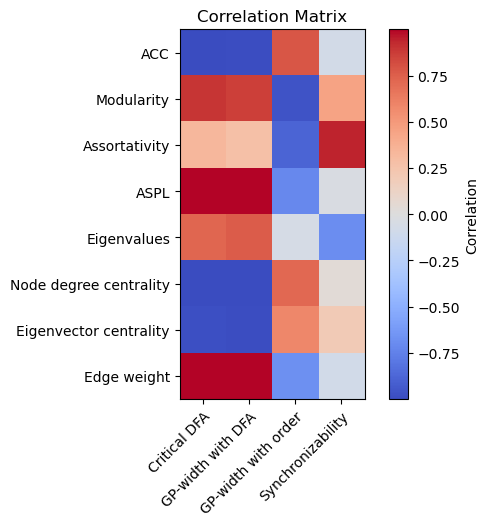

[[0.04919777 0.08421227 0.42673772 0.95161043]
 [0.29992887 0.33494337 0.17600662 0.70087933]
 [0.78669693 0.82171143 0.31076144 0.21411127]
 [0.01915753 0.01585697 0.49509302 0.98003427]
 [0.48557017 0.45055567 0.96150566 0.51362163]
 [0.01915753 0.01585697 0.49509302 0.98003427]
 [0.12611106 0.09109656 0.60204655 0.87308074]
 [0.04936482 0.01435032 0.52530031 0.94982698]]


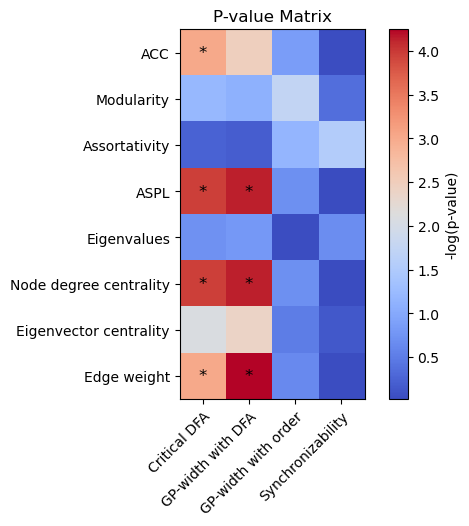

In [60]:
criticality_metrics = np.array(criticality_metrics)
network_metrics = np.array([metrics_254, metrics_330, metrics_781])
print(criticality_metrics.shape)
print(network_metrics.shape)

correlation_matrix = np.empty((network_metrics.shape[1], criticality_metrics.shape[1]))
p_value_matrix = np.empty((network_metrics.shape[1], criticality_metrics.shape[1]))

for i in range(network_metrics.shape[1]):
    for j in range(criticality_metrics.shape[1]):
        correlation_coefficient, p_value = stats.pearsonr(network_metrics[:, i], criticality_metrics[:, j])
        correlation_matrix[i, j] = correlation_coefficient
        p_value_matrix[i, j] = p_value

# Plot correlation matrix
fig, ax = plt.subplots()
print(correlation_matrix)
im = ax.imshow(correlation_matrix, cmap='coolwarm', vmin=np.min(correlation_matrix), vmax=np.max(correlation_matrix))

ax.set_xticks(np.arange(criticality_metrics.shape[1]))
ax.set_yticks(np.arange(network_metrics.shape[1]))

ax.set_xticklabels(['Critical DFA', 'GP-width with DFA', 'GP-width with order', 'Synchronizability'])
ax.set_yticklabels(['ACC', 'Modularity', 'Assortativity', 'ASPL', 'Eigenvalues', 'Node degree centrality', 'Eigenvector centrality', 'Edge weight'])

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

cbar = ax.figure.colorbar(im, ax=ax, label='Correlation')
ax.set_title('Correlation Matrix')
plt.show()

# Plot p-value matrix
fig, ax = plt.subplots()
print(p_value_matrix)
im = ax.imshow(-np.log(p_value_matrix), cmap='coolwarm')
ax.set_xticks(np.arange(criticality_metrics.shape[1]))
ax.set_yticks(np.arange(network_metrics.shape[1]))

ax.set_xticklabels(['Critical DFA', 'GP-width with DFA', 'GP-width with order', 'Synchronizability'])
ax.set_yticklabels(['ACC', 'Modularity', 'Assortativity', 'ASPL', 'Eigenvalues', 'Node degree centrality', 'Eigenvector centrality', 'Edge weight'])

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
for i in range(network_metrics.shape[1]):
    for j in range(criticality_metrics.shape[1]):
        p_value = p_value_matrix[i, j]
        if p_value < 0.001:
            ax.text(j, i, '***', ha='center', va='center', color='black', fontsize=12)
        elif p_value < 0.01:
            ax.text(j, i, '**', ha='center', va='center', color='black', fontsize=12)
        elif p_value < 0.05:
            ax.text(j, i, '*', ha='center', va='center', color='black', fontsize=12)


cbar = ax.figure.colorbar(im, ax=ax, label='-log(p-value)')
ax.set_title('P-value Matrix')
plt.show()

In [4]:
clinical_ids = np.load('clinical_ids.npy')

order_KL_236 = np.empty((86, 30, 30))
PLV_KL_236 = np.empty((86, 30, 30))
DFA_KL_236 = np.empty((86, 30, 30))
sd_KL_236 = np.empty((86, 30, 30))
for i, n in enumerate(clinical_ids):
    for k in range(1, 31):
        for l in range(1, 31):
            DFA_KL_236[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-236/sub-236_K-{k}_L-{l}_dfa.npy"))
            PLV_KL_236[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-236/sub-236_K-{k}_L-{l}_plv.npy"))
            order_KL_236[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-236/sub-236_K-{k}_L-{l}_order.npy"))
            sd_KL_236[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-236/sub-236_K-{k}_L-{l}_std.npy"))

In [3]:
clinical_ids = np.load('clinical_ids.npy')

order_KL_86 = np.empty((86, 30, 30))
PLV_KL_86 = np.empty((86, 30, 30))
DFA_KL_86 = np.empty((86, 30, 30))
sd_KL_86 = np.empty((86, 30, 30))
for i, n in enumerate(clinical_ids[:30]):
    for k in range(1, 31):
        for l in range(1, 31):
            DFA_KL_86[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-{n}/sub-{n}_K-{k}_L-{l}_dfa.npy"))
            PLV_KL_86[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-{n}/sub-{n}_K-{k}_L-{l}_plv.npy"))
            order_KL_86[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-{n}/sub-{n}_K-{k}_L-{l}_order.npy"))
            sd_KL_86[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-{n}/sub-{n}_K-{k}_L-{l}_std.npy"))

FileNotFoundError: [Errno 2] No such file or directory: '/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-156/sub-156_K-27_L-27_dfa.npy'

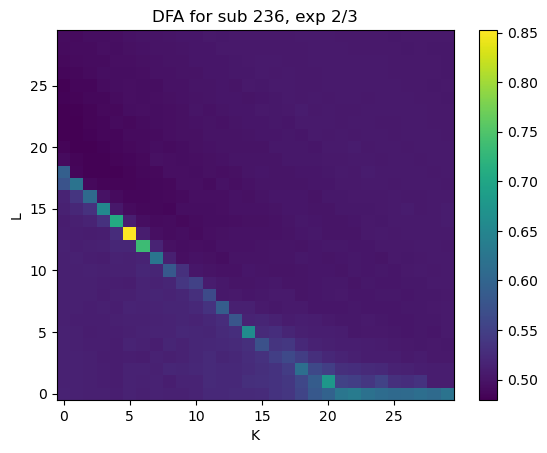

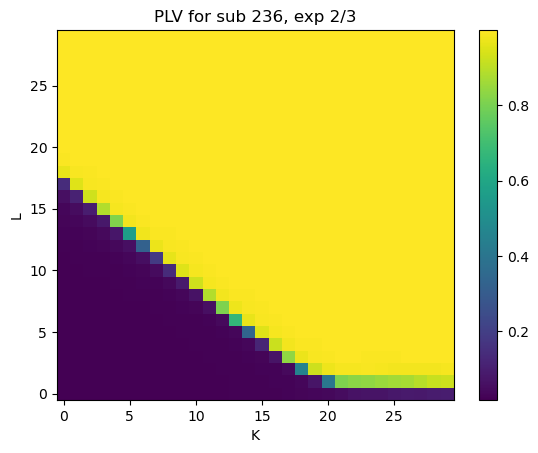

In [5]:
plt.figure()
im = plt.imshow(DFA_KL_236[1].T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("DFA for sub 236, exp 2/3")
plt.colorbar(im)
plt.show() 

im = plt.imshow(PLV_KL_236[1].T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("PLV for sub 236, exp 2/3")
plt.colorbar(im)
plt.show()